<a href="https://www.kaggle.com/code/mlbysoham/temperature-time-series-analysis?scriptVersionId=153233147" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data wrangling

In [2]:
metro=pd.read_csv(r"/kaggle/input/weather_madrid_lemd_1997_2015.csv/weather_madrid_LEMD_1997_2015.csv",index_col='CET',parse_dates=True)
metro

#reading the csv file

Max TemperatureC  Mean TemperatureC  Min TemperatureC  Dew PointC  \
CET                                                                             
1997-01-01               7.0                4.0               2.0         5.0   
1997-01-02               7.0                3.0               0.0         6.0   
1997-01-03               5.0                3.0               2.0         5.0   
1997-01-04               7.0                3.0              -1.0        -2.0   
1997-01-05               2.0                0.0              -1.0         2.0   
...                      ...                ...               ...         ...   
2015-12-27              14.0                7.0              -1.0         6.0   
2015-12-28              15.0                8.0               2.0         8.0   
2015-12-29              11.0                8.0               5.0         9.0   
2015-12-30               9.0                8.0               6.0         7.0   
2015-12-31              12.0               10.0               7.0        10.0   

            MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
CET                                                                       
1997-01-01             3.0            2.0         100.0            95.0   
1997-01-02             3.0            0.0         100.0            92.0   
1997-01-03             1.0           -1.0         100.0            85.0   
1997-01-04            -3.0           -4.0          86.0            63.0   
1997-01-05             0.0           -3.0         100.0            95.0   
...                    ...            ...           ...             ...   
2015-12-27             2.0           -2.0         100.0            77.0   
2015-12-28             4.0            1.0         100.0            78.0   
2015-12-29             7.0            5.0         100.0            89.0   
2015-12-30             6.0            5.0          93.0            87.0   
2015-12-31             8.0            7.0         100.0            90.0   

             Min Humidity   Max Sea Level PressurehPa  ...   Max VisibilityKm  \
CET                                                    ...                      
1997-01-01           76.0                        1010  ...               10.0   
1997-01-02           71.0                        1007  ...               10.0   
1997-01-03           70.0                        1005  ...               10.0   
1997-01-04           49.0                        1012  ...               10.0   
1997-01-05           86.0                        1012  ...               10.0   
...                   ...                         ...  ...                ...   
2015-12-27           30.0                        1035  ...               31.0   
2015-12-28           34.0                        1031  ...               31.0   
2015-12-29           66.0                        1034  ...               31.0   
2015-12-30           70.0                        1034  ...               19.0   
2015-12-31           70.0                        1027  ...               31.0   

             Mean VisibilityKm   Min VisibilitykM   Max Wind SpeedKm/h  \
CET                                                                      
1997-01-01                 9.0                4.0                   13   
1997-01-02                 9.0                4.0                   26   
1997-01-03                10.0                7.0                   27   
1997-01-04                10.0               10.0                   27   
1997-01-05                 5.0                1.0                   14   
...                        ...                ...                  ...   
2015-12-27                14.0                5.0                   14   
2015-12-28                14.0                8.0                   27   
2015-12-29                 9.0                0.0                   14   
2015-12-30                10.0                6.0                   14   
2015-12-31                 8.0          

# Data Cleaning

In [3]:
metro.describe(include='all')

Max TemperatureC  Mean TemperatureC  Min TemperatureC   Dew PointC  \
count        6810.000000        6809.000000       6810.000000  6810.000000   
unique               NaN                NaN               NaN          NaN   
top                  NaN                NaN               NaN          NaN   
freq                 NaN                NaN               NaN          NaN   
mean           21.039648          14.658687          8.640529     8.120705   
std             8.867187           7.580461          6.837626     4.741067   
min             0.000000          -3.000000        -10.000000   -12.000000   
25%            13.000000           8.000000          3.000000     5.000000   
50%            20.000000          14.000000          9.000000     8.000000   
75%            29.000000          21.000000         14.000000    12.000000   
max            41.000000          32.000000         28.000000    20.000000   

        MeanDew PointC  Min DewpointC  Max Humidity   Mean Humidity  \
count      6810.000000    6810.000000   6810.000000     6810.000000   
unique             NaN            NaN           NaN             NaN   
top                NaN            NaN           NaN             NaN   
freq               NaN            NaN           NaN             NaN   
mean          4.976211       1.451248     81.139354       57.971366   
std           4.654270       4.909705     17.531839       19.675744   
min         -15.000000     -22.000000     16.000000       15.000000   
25%           2.000000      -2.000000     68.000000       41.000000   
50%           6.000000       2.000000     87.000000       59.000000   
75%           8.000000       5.000000     94.000000       74.000000   
max          16.000000      14.000000    100.000000      100.000000   

         Min Humidity   Max Sea Level PressurehPa  ...   Max VisibilityKm  \
count     6810.000000                 6812.000000  ...        5872.000000   
unique            NaN                         NaN  ...                NaN   
top               NaN                         NaN  ...                NaN   
freq              NaN                         NaN  ...                NaN   
mean        34.729369                 1020.529360  ...          14.644074   
std         19.320359                    6.235941  ...           8.770024   
min          4.000000                  994.000000  ...           1.000000   
25%         19.000000                 1017.000000  ...          10.000000   
50%         32.000000                 1020.000000  ...          10.000000   
75%         47.750000                 1024.000000  ...          10.000000   
max        100.000000                 1047.000000  ...          31.000000   

         Mean VisibilityKm   Min VisibilitykM   Max Wind SpeedKm/h  \
count          5872.000000        5872.000000          6812.000000   
unique                 NaN                NaN                  NaN   
top                    NaN                NaN                  NaN   
freq                   NaN                NaN                  NaN   
mean             11.719857           9.134877            21.953171   
std               5.592324           5.075065             9.903914   
min               0.000000           0.000000             0.000000   
25%              10.000000           7.000000            14.000000   
50%              10.000000          10.000000            21.000000   
75%              10.000000          10.000000            27.000000   
max              31.000000          31.000000           182.000000   

         Mean Wind SpeedKm/h   Max Gust SpeedKm/h  Precipitationmm  \
count            6812.000000          3506.000000      6812.000000   
unique                   NaN                  NaN              NaN   
top                      NaN                  NaN              NaN   
freq                     NaN                  NaN              NaN   
mean                9.170728            43.988306         0.111182   
std                 5.110013    

In [4]:
metro.isnull().sum()

Max TemperatureC                  2
Mean TemperatureC                 3
Min TemperatureC                  2
Dew PointC                        2
MeanDew PointC                    2
Min DewpointC                     2
Max Humidity                      2
 Mean Humidity                    2
 Min Humidity                     2
 Max Sea Level PressurehPa        0
 Mean Sea Level PressurehPa       0
 Min Sea Level PressurehPa        0
 Max VisibilityKm               940
 Mean VisibilityKm              940
 Min VisibilitykM               940
 Max Wind SpeedKm/h               0
 Mean Wind SpeedKm/h              0
 Max Gust SpeedKm/h            3306
Precipitationmm                   0
 CloudCover                    1372
 Events                        5014
WindDirDegrees                    0
dtype: int64

In [5]:
metro.drop(['Max TemperatureC','Min TemperatureC','Dew PointC','Min DewpointC','Max Humidity',' Min Humidity',' Max Sea Level PressurehPa'
        ,' Min Sea Level PressurehPa',' Max VisibilityKm',' Min VisibilitykM',' Max Wind SpeedKm/h',' Max Gust SpeedKm/h'],axis=1,inplace=True)

#dropping the unnecessary columns

metro

Mean TemperatureC  MeanDew PointC   Mean Humidity  \
CET                                                             
1997-01-01                4.0             3.0            95.0   
1997-01-02                3.0             3.0            92.0   
1997-01-03                3.0             1.0            85.0   
1997-01-04                3.0            -3.0            63.0   
1997-01-05                0.0             0.0            95.0   
...                       ...             ...             ...   
2015-12-27                7.0             2.0            77.0   
2015-12-28                8.0             4.0            78.0   
2015-12-29                8.0             7.0            89.0   
2015-12-30                8.0             6.0            87.0   
2015-12-31               10.0             8.0            90.0   

             Mean Sea Level PressurehPa   Mean VisibilityKm  \
CET                                                           
1997-01-01                         1008                 9.0   
1997-01-02                         1003                 9.0   
1997-01-03                          999                10.0   
1997-01-04                         1010                10.0   
1997-01-05                         1008                 5.0   
...                                 ...                 ...   
2015-12-27                         1030                14.0   
2015-12-28                         1027                14.0   
2015-12-29                         1030                 9.0   
2015-12-30                         1029                10.0   
2015-12-31                         1025                 8.0   

             Mean Wind SpeedKm/h  Precipitationmm   CloudCover     Events  \
CET                                                                         
1997-01-01                     6             0.00          6.0        NaN   
1997-01-02                     8             0.00          5.0       Rain   
1997-01-03                    19             0.00          6.0  Rain-Snow   
1997-01-04                    19             0.00          2.0        NaN   
1997-01-05                     6             0.00          7.0       Snow   
...                          ...              ...          ...        ...   
2015-12-27                     6             0.00          8.0        Fog   
2015-12-28                     8             0.51          7.0       Rain   
2015-12-29                     8             2.03          5.0   Fog-Rain   
2015-12-30                     5             0.00          6.0        NaN   
2015-12-31                     6             0.25          6.0       Rain   

            WindDirDegrees  
CET                         
1997-01-01             229  
1997-01-02             143  
1997-01-03             256  
1997-01-04             284  
1997-01-05               2  
...                    ...  
2015-12-27              38  
2015-12-28             243  
2015-12-29             190  
2015-12-30             256  
2015-12-31             313  

[6812 rows x 10 columns]

In [6]:
metro.isnull().sum()

Mean TemperatureC                 3
MeanDew PointC                    2
 Mean Humidity                    2
 Mean Sea Level PressurehPa       0
 Mean VisibilityKm              940
 Mean Wind SpeedKm/h              0
Precipitationmm                   0
 CloudCover                    1372
 Events                        5014
WindDirDegrees                    0
dtype: int64

In [7]:
metro.columns

Index(['Mean TemperatureC', 'MeanDew PointC', ' Mean Humidity',
       ' Mean Sea Level PressurehPa', ' Mean VisibilityKm',
       ' Mean Wind SpeedKm/h', 'Precipitationmm', ' CloudCover', ' Events',
       'WindDirDegrees'],
      dtype='object')

In [8]:
d=metro.describe(include='all')
d

Mean TemperatureC  MeanDew PointC   Mean Humidity  \
count         6809.000000     6810.000000     6810.000000   
unique                NaN             NaN             NaN   
top                   NaN             NaN             NaN   
freq                  NaN             NaN             NaN   
mean            14.658687        4.976211       57.971366   
std              7.580461        4.654270       19.675744   
min             -3.000000      -15.000000       15.000000   
25%              8.000000        2.000000       41.000000   
50%             14.000000        6.000000       59.000000   
75%             21.000000        8.000000       74.000000   
max             32.000000       16.000000      100.000000   

         Mean Sea Level PressurehPa   Mean VisibilityKm   Mean Wind SpeedKm/h  \
count                   6812.000000         5872.000000           6812.000000   
unique                          NaN                 NaN                   NaN   
top                             NaN                 NaN                   NaN   
freq                            NaN                 NaN                   NaN   
mean                    1017.973136           11.719857              9.170728   
std                        6.480085            5.592324              5.110013   
min                      986.000000            0.000000              0.000000   
25%                     1014.000000           10.000000              6.000000   
50%                     1018.000000           10.000000              8.000000   
75%                     1022.000000           10.000000             11.000000   
max                     1043.000000           31.000000             39.000000   

        Precipitationmm   CloudCover  Events  WindDirDegrees  
count       6812.000000  5440.000000    1798     6812.000000  
unique              NaN          NaN      15             NaN  
top                 NaN          NaN    Rain             NaN  
freq                NaN          NaN    1140             NaN  
mean           0.111182     3.206066     NaN      197.234586  
std            0.967174     1.808948     NaN      119.872777  
min            0.000000     0.000000     NaN       -1.000000  
25%            0.000000     2.000000     NaN       66.000000  
50%            0.000000     3.000000     NaN      223.000000  
75%            0.000000     5.000000     NaN      299.000000  
max           32.000000     8.000000     NaN      360.000000

In [9]:
metro[' Events'].replace({np.nan: None, 'NaN': None}, inplace=True)

In [10]:
#initially removing the null values in 'Events' column

for i in range(len(metro[' Events'])):
    if metro[' Events'][i] is None:
        j=i
        while(metro[' Events'][j] is None):
            j+=1
        metro[' Events'][i]=metro[' Events'][j]



/tmp/ipykernel_19/1194233415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro[' Events'][i]=metro[' Events'][j]
/tmp/ipykernel_19/1194233415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro[' Events'][i]=metro[' Events'][j]
/tmp/ipykernel_19/1194233415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro[' Events'][i]=metro[' Events'][j]
/tmp/ipykernel_19/1194233415.py:8: SettingWithCopyWarning: 
A value is tryin

In [11]:
metro[' Events'].isnull().sum()

0

In [12]:
metro.isnull().sum()

Mean TemperatureC                 3
MeanDew PointC                    2
 Mean Humidity                    2
 Mean Sea Level PressurehPa       0
 Mean VisibilityKm              940
 Mean Wind SpeedKm/h              0
Precipitationmm                   0
 CloudCover                    1372
 Events                           0
WindDirDegrees                    0
dtype: int64

In [13]:
metro['Mean TemperatureC'].replace({np.nan: '?', 'NaN': '?',None: '?'}, inplace=True)
metro['MeanDew PointC'].replace({np.nan: '?', 'NaN': '?',None: '?'}, inplace=True)
metro[' Mean Humidity'].replace({np.nan: '?', 'NaN': '?',None: '?'}, inplace=True)
metro[' Mean VisibilityKm'].replace({np.nan: '?', 'NaN': '?',None: '?'}, inplace=True)
metro[' CloudCover'].replace({np.nan: '?', 'NaN': '?',None: '?'}, inplace=True)

#renaming all the missing values as 'None'

In [14]:
metro['Mean TemperatureC'].replace('?',d['Mean TemperatureC'][4],inplace=True)
metro['MeanDew PointC'].replace('?',d['MeanDew PointC'][4],inplace=True)
metro[' Mean Humidity'].replace('?',d[' Mean Humidity'][4],inplace=True)
metro[' Mean VisibilityKm'].replace('?',d[' Mean VisibilityKm'][4],inplace=True)
metro[' CloudCover'].replace('?',d[' CloudCover'][4],inplace=True)

In [15]:
metro.isnull().sum()

Mean TemperatureC              0
MeanDew PointC                 0
 Mean Humidity                 0
 Mean Sea Level PressurehPa    0
 Mean VisibilityKm             0
 Mean Wind SpeedKm/h           0
Precipitationmm                0
 CloudCover                    0
 Events                        0
WindDirDegrees                 0
dtype: int64

In [16]:
metro.info


<bound method DataFrame.info of             Mean TemperatureC  MeanDew PointC   Mean Humidity  \
CET                                                             
1997-01-01                4.0             3.0            95.0   
1997-01-02                3.0             3.0            92.0   
1997-01-03                3.0             1.0            85.0   
1997-01-04                3.0            -3.0            63.0   
1997-01-05                0.0             0.0            95.0   
...                       ...             ...             ...   
2015-12-27                7.0             2.0            77.0   
2015-12-28                8.0             4.0            78.0   
2015-12-29                8.0             7.0            89.0   
2015-12-30                8.0             6.0            87.0   
2015-12-31               10.0             8.0            90.0   

             Mean Sea Level PressurehPa   Mean VisibilityKm  \
CET                                                        

In [17]:
metro.describe(include='all')

Mean TemperatureC  MeanDew PointC   Mean Humidity  \
count         6812.000000     6812.000000     6812.000000   
unique                NaN             NaN             NaN   
top                   NaN             NaN             NaN   
freq                  NaN             NaN             NaN   
mean            14.658687        4.976211       57.971366   
std              7.578792        4.653587       19.672854   
min             -3.000000      -15.000000       15.000000   
25%              8.000000        2.000000       41.000000   
50%             14.000000        6.000000       59.000000   
75%             21.000000        8.000000       74.000000   
max             32.000000       16.000000      100.000000   

         Mean Sea Level PressurehPa   Mean VisibilityKm   Mean Wind SpeedKm/h  \
count                   6812.000000         6812.000000           6812.000000   
unique                          NaN                 NaN                   NaN   
top                             NaN                 NaN                   NaN   
freq                            NaN                 NaN                   NaN   
mean                    1017.973136           11.719857              9.170728   
std                        6.480085            5.192098              5.110013   
min                      986.000000            0.000000              0.000000   
25%                     1014.000000           10.000000              6.000000   
50%                     1018.000000           10.000000              8.000000   
75%                     1022.000000           11.719857             11.000000   
max                     1043.000000           31.000000             39.000000   

        Precipitationmm   CloudCover  Events  WindDirDegrees  
count       6812.000000  6812.000000    6812     6812.000000  
unique              NaN          NaN      15             NaN  
top                 NaN          NaN    Rain             NaN  
freq                NaN          NaN    4245             NaN  
mean           0.111182     3.206066     NaN      197.234586  
std            0.967174     1.616517     NaN      119.872777  
min            0.000000     0.000000     NaN       -1.000000  
25%            0.000000     2.000000     NaN       66.000000  
50%            0.000000     3.206066     NaN      223.000000  
75%            0.000000     4.000000     NaN      299.000000  
max           32.000000     8.000000     NaN      360.000000

# Data Analysis

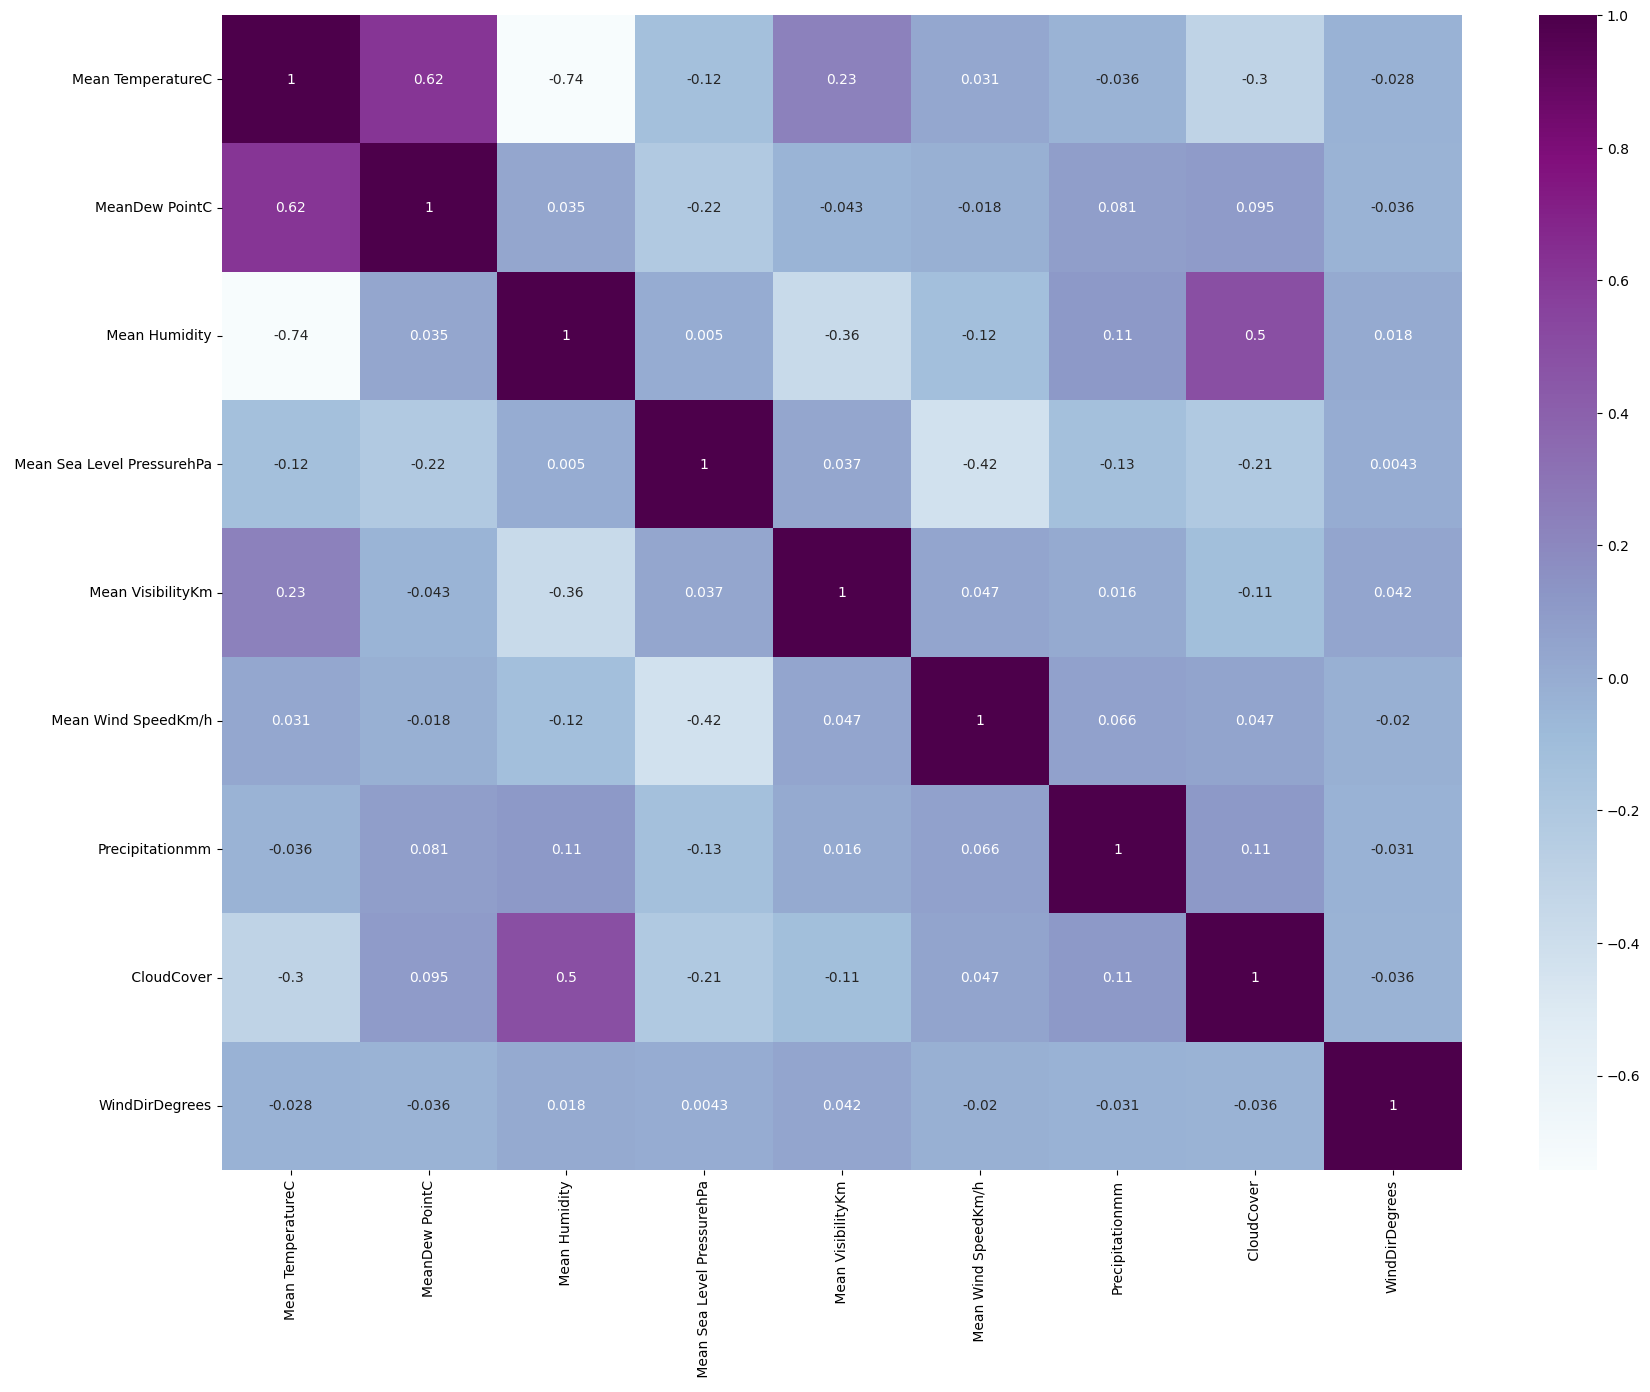

In [18]:
# heatmap analysis

num_metro = metro.drop([' Events'],axis=1)   #a dataset excluding the string column ' Events'

plt.figure(figsize=(20,15))
cor = num_metro.corr()
sns.heatmap(cor,annot=True,cmap='BuPu')
plt.show()

#we find that all the columns have unique dependencies

<Axes: xlabel='CET'>

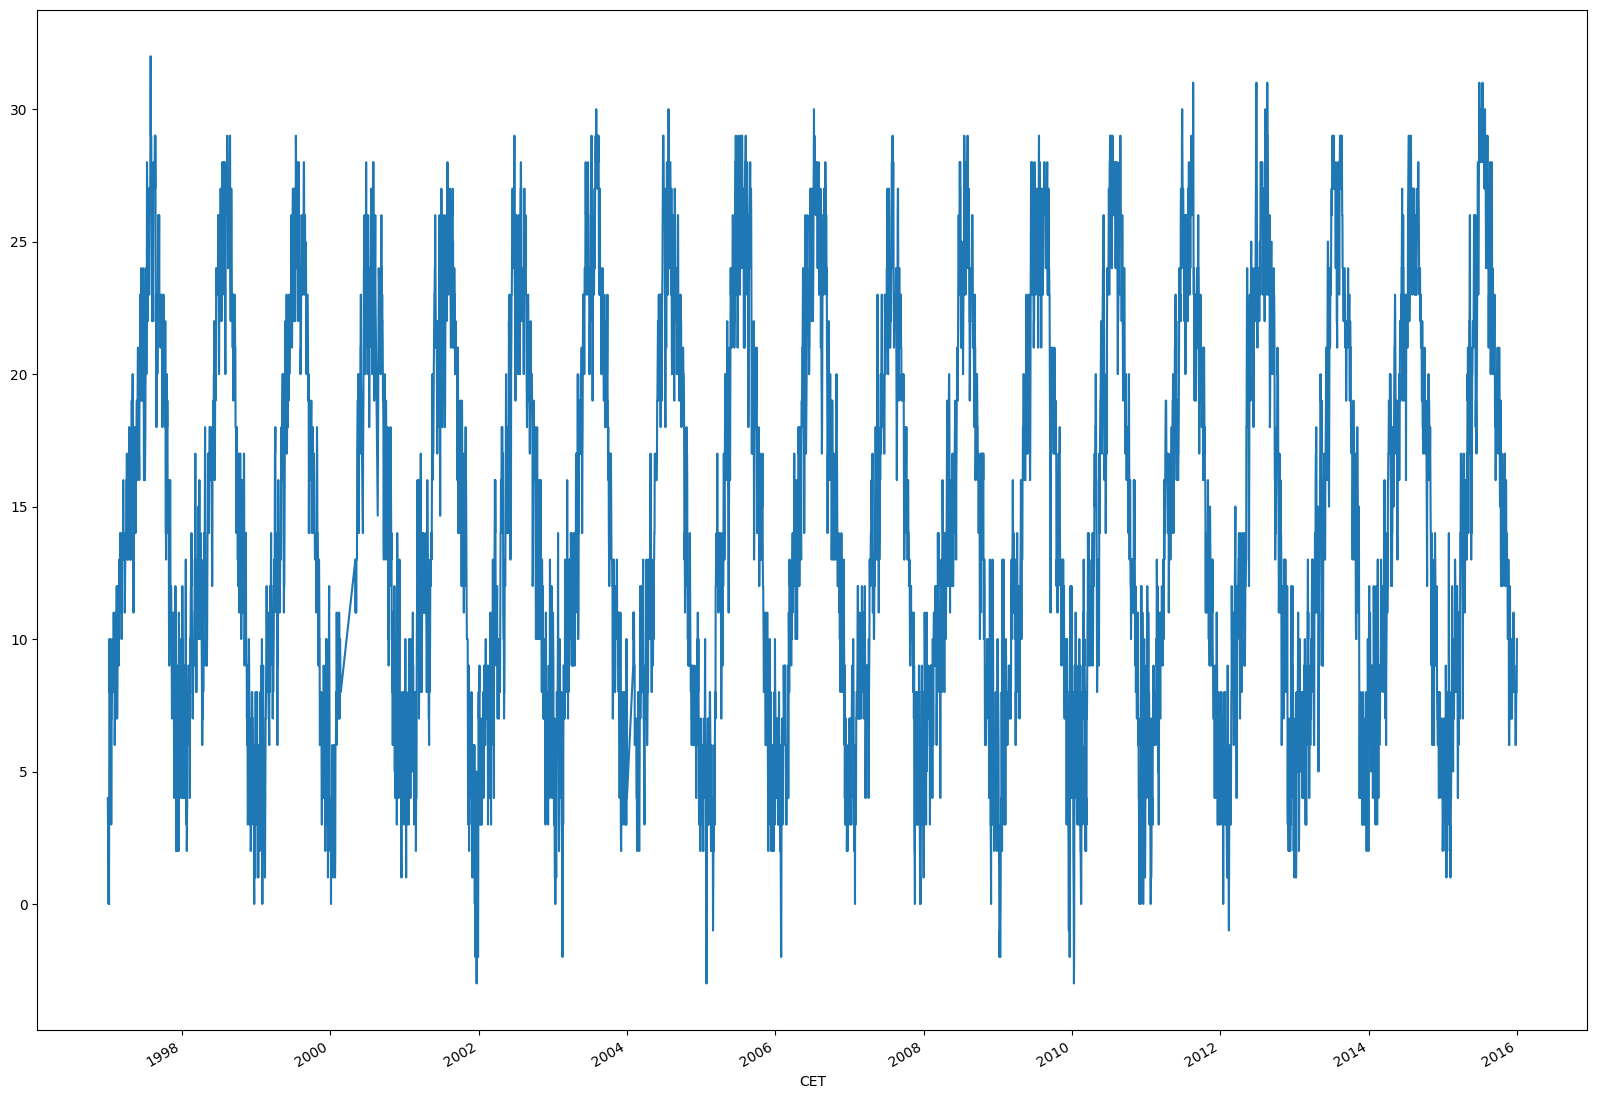

In [19]:
metro['Mean TemperatureC'].plot(figsize=(20,15))

In [20]:
metro['MeanDew PointC'].nunique()

33

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 59.6% of the points cannot be placed

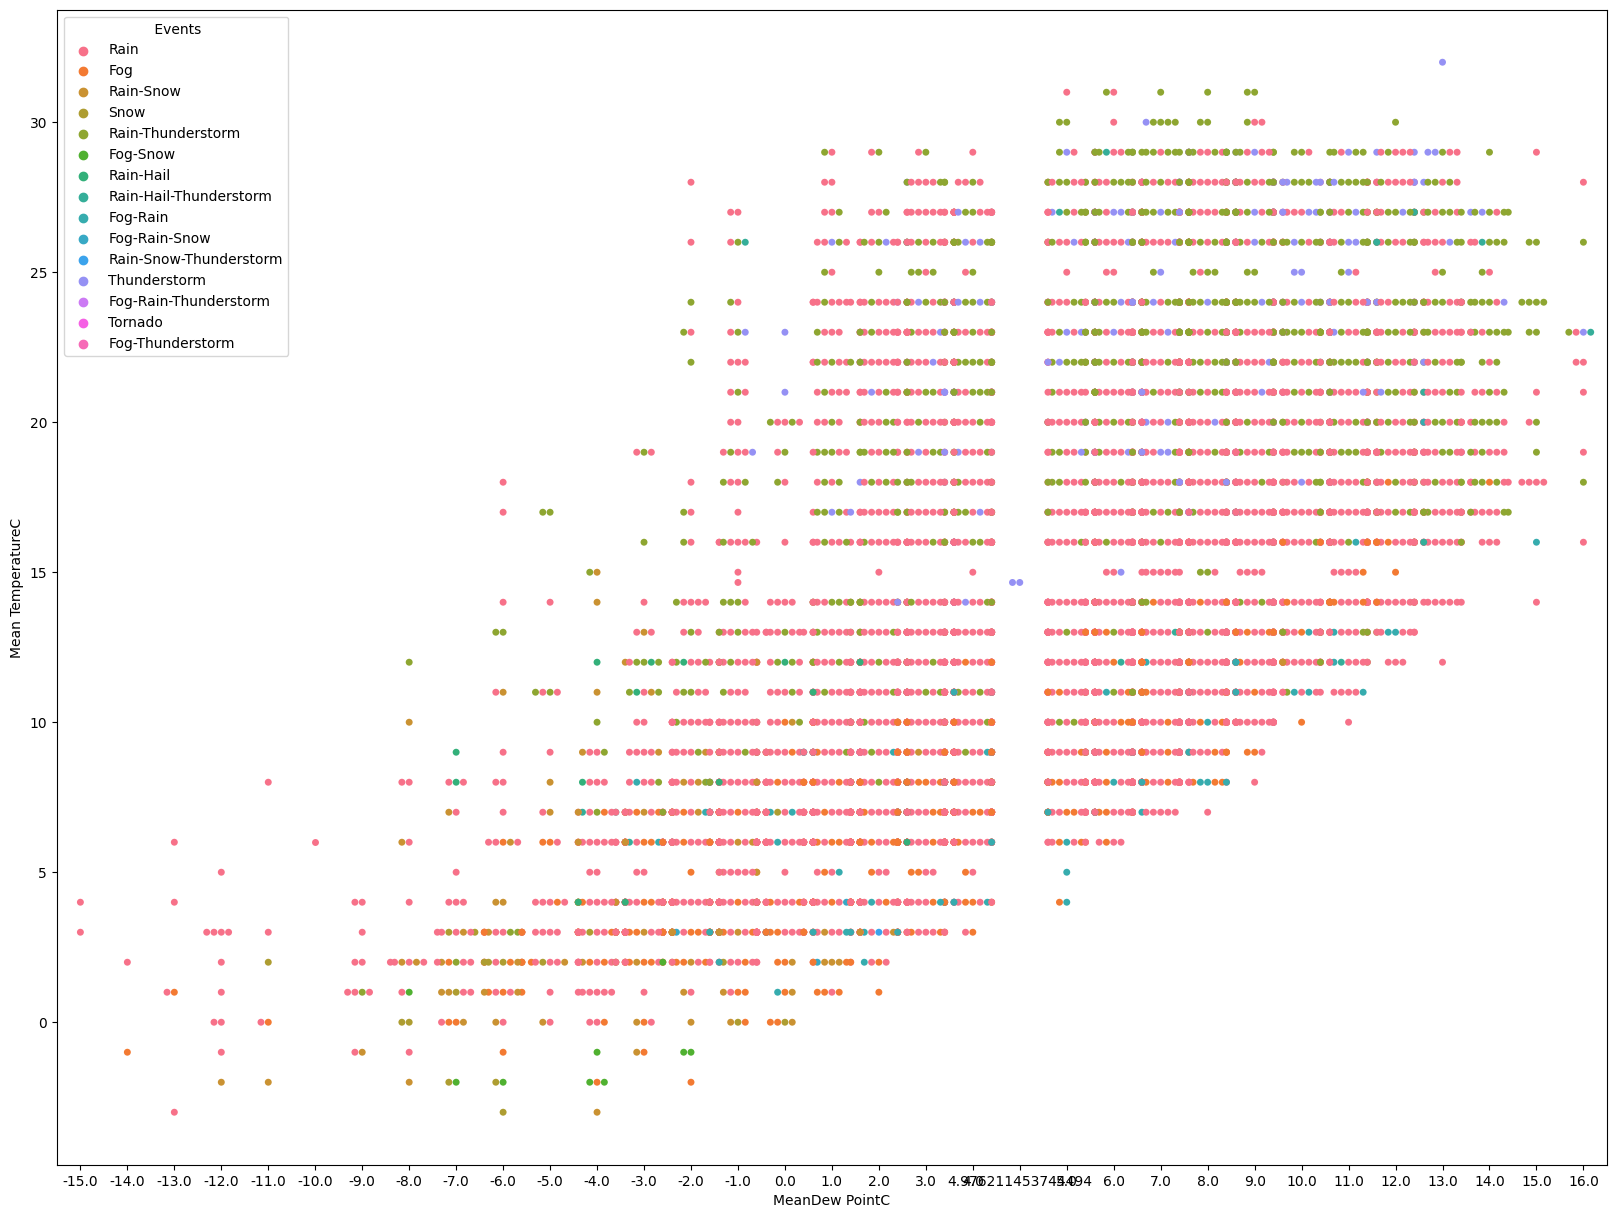

In [21]:
plt.figure(figsize=(20,15))
sns.swarmplot(x=metro['MeanDew PointC'],y=metro['Mean TemperatureC'],hue=metro[' Events'])
plt.show()

In [22]:
metro[' Mean Humidity'].nunique()

87

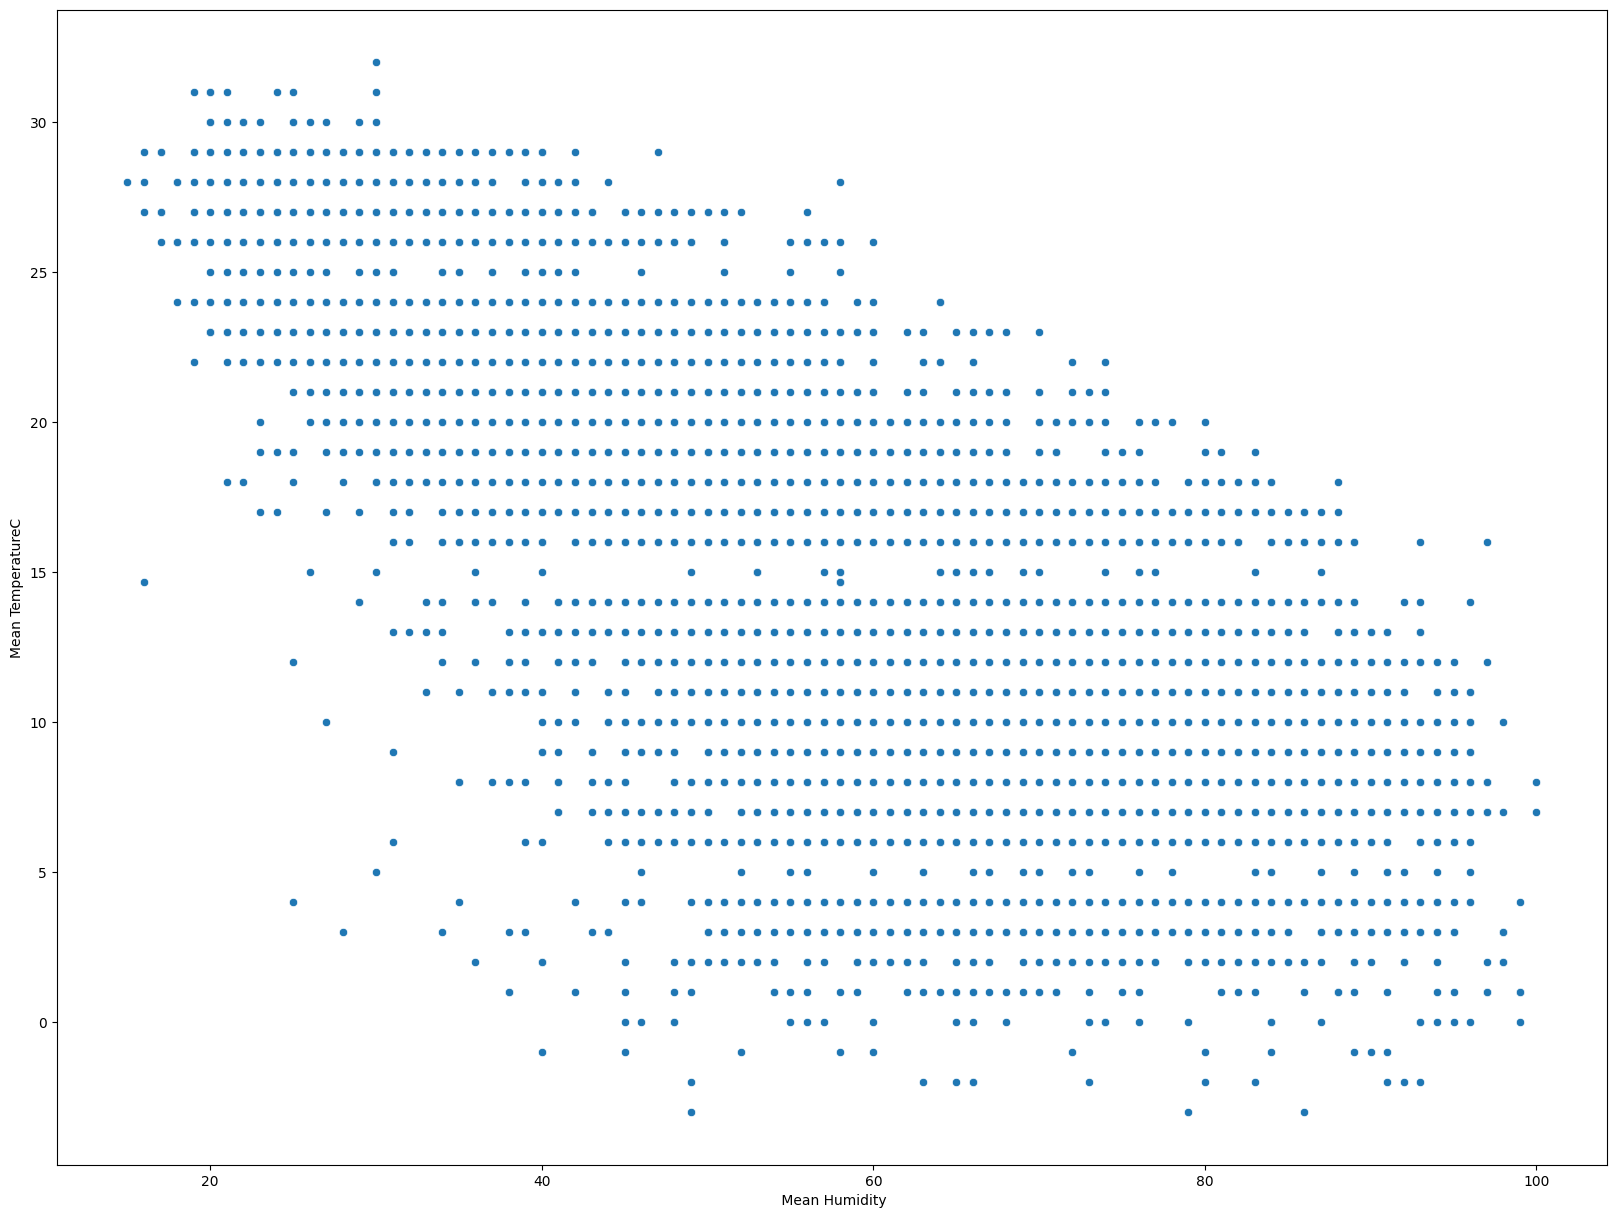

In [23]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=metro[' Mean Humidity'],y=metro['Mean TemperatureC'])
plt.show()

In [24]:
metro[' Events'].nunique()

15

/tmp/ipykernel_19/3485012187.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=metro['Mean TemperatureC'],hue=metro[' Events'],data=metro)


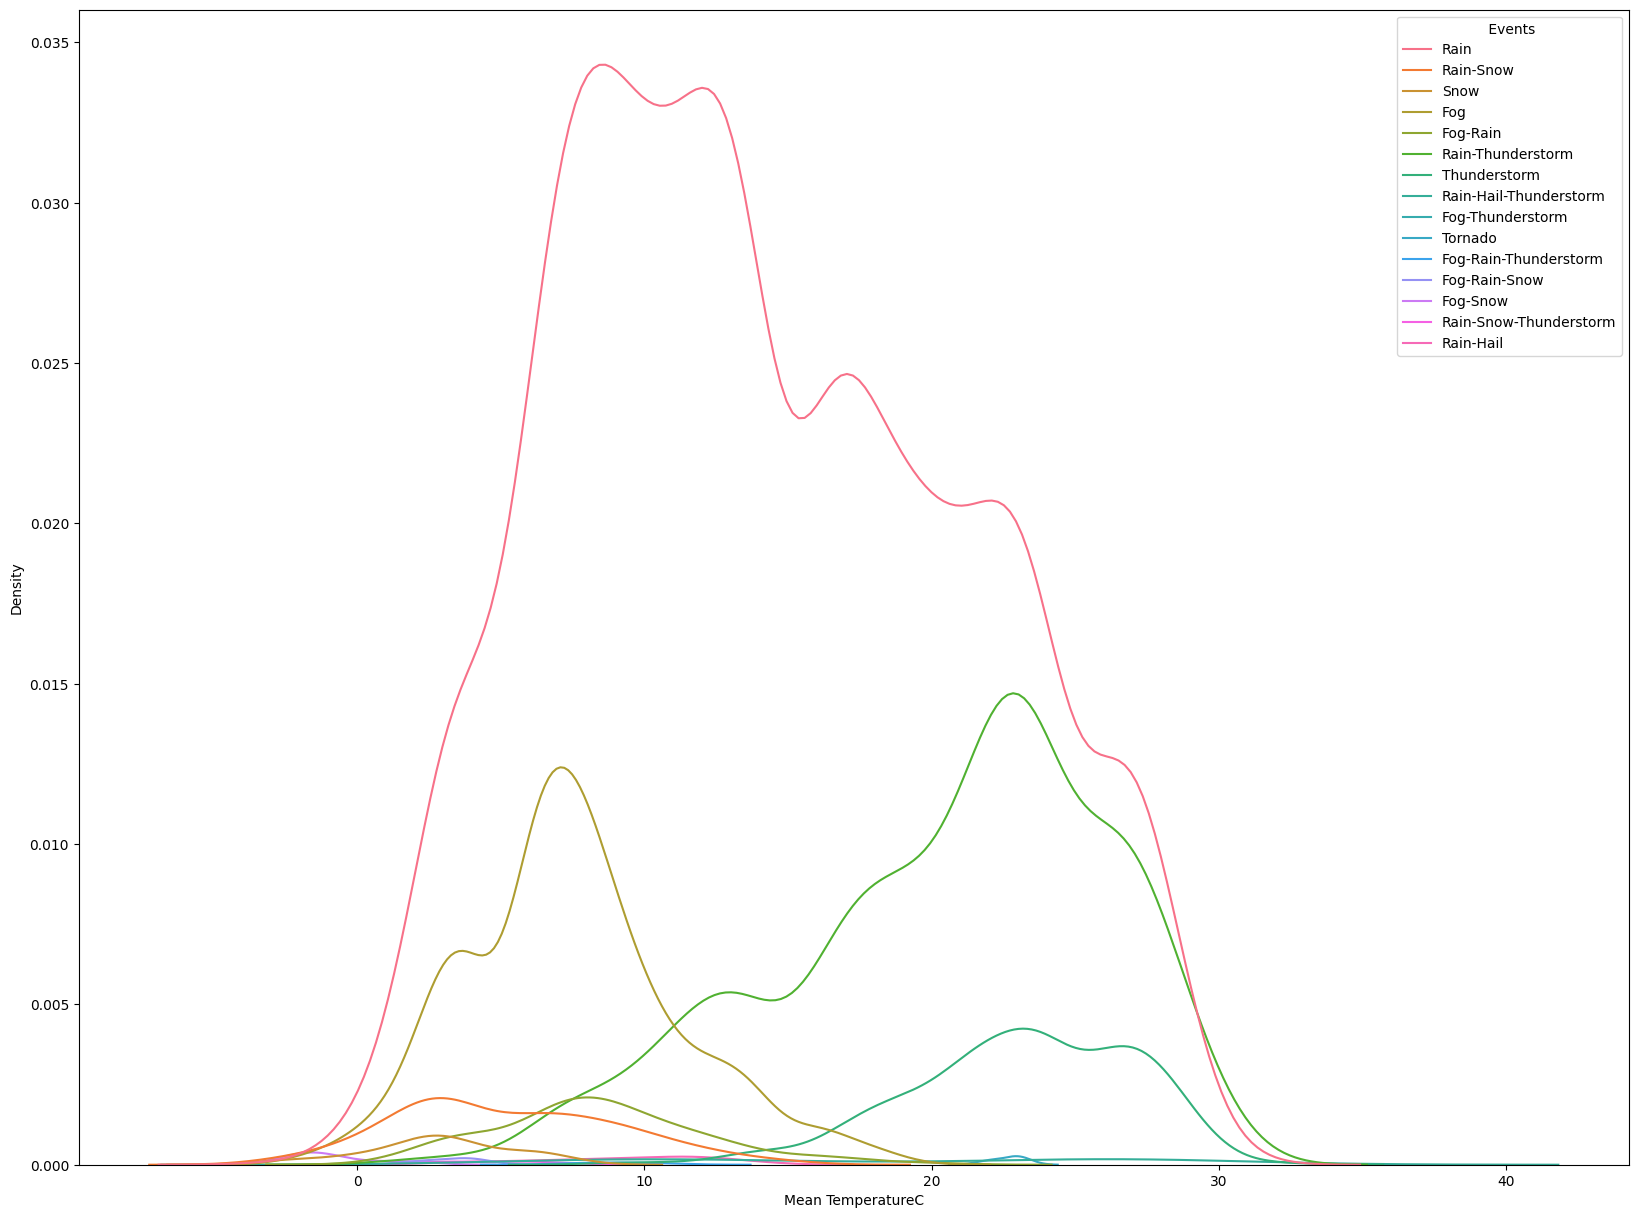

In [25]:
plt.figure(figsize=(20,15))
sns.kdeplot(x=metro['Mean TemperatureC'],hue=metro[' Events'],data=metro)
plt.show()

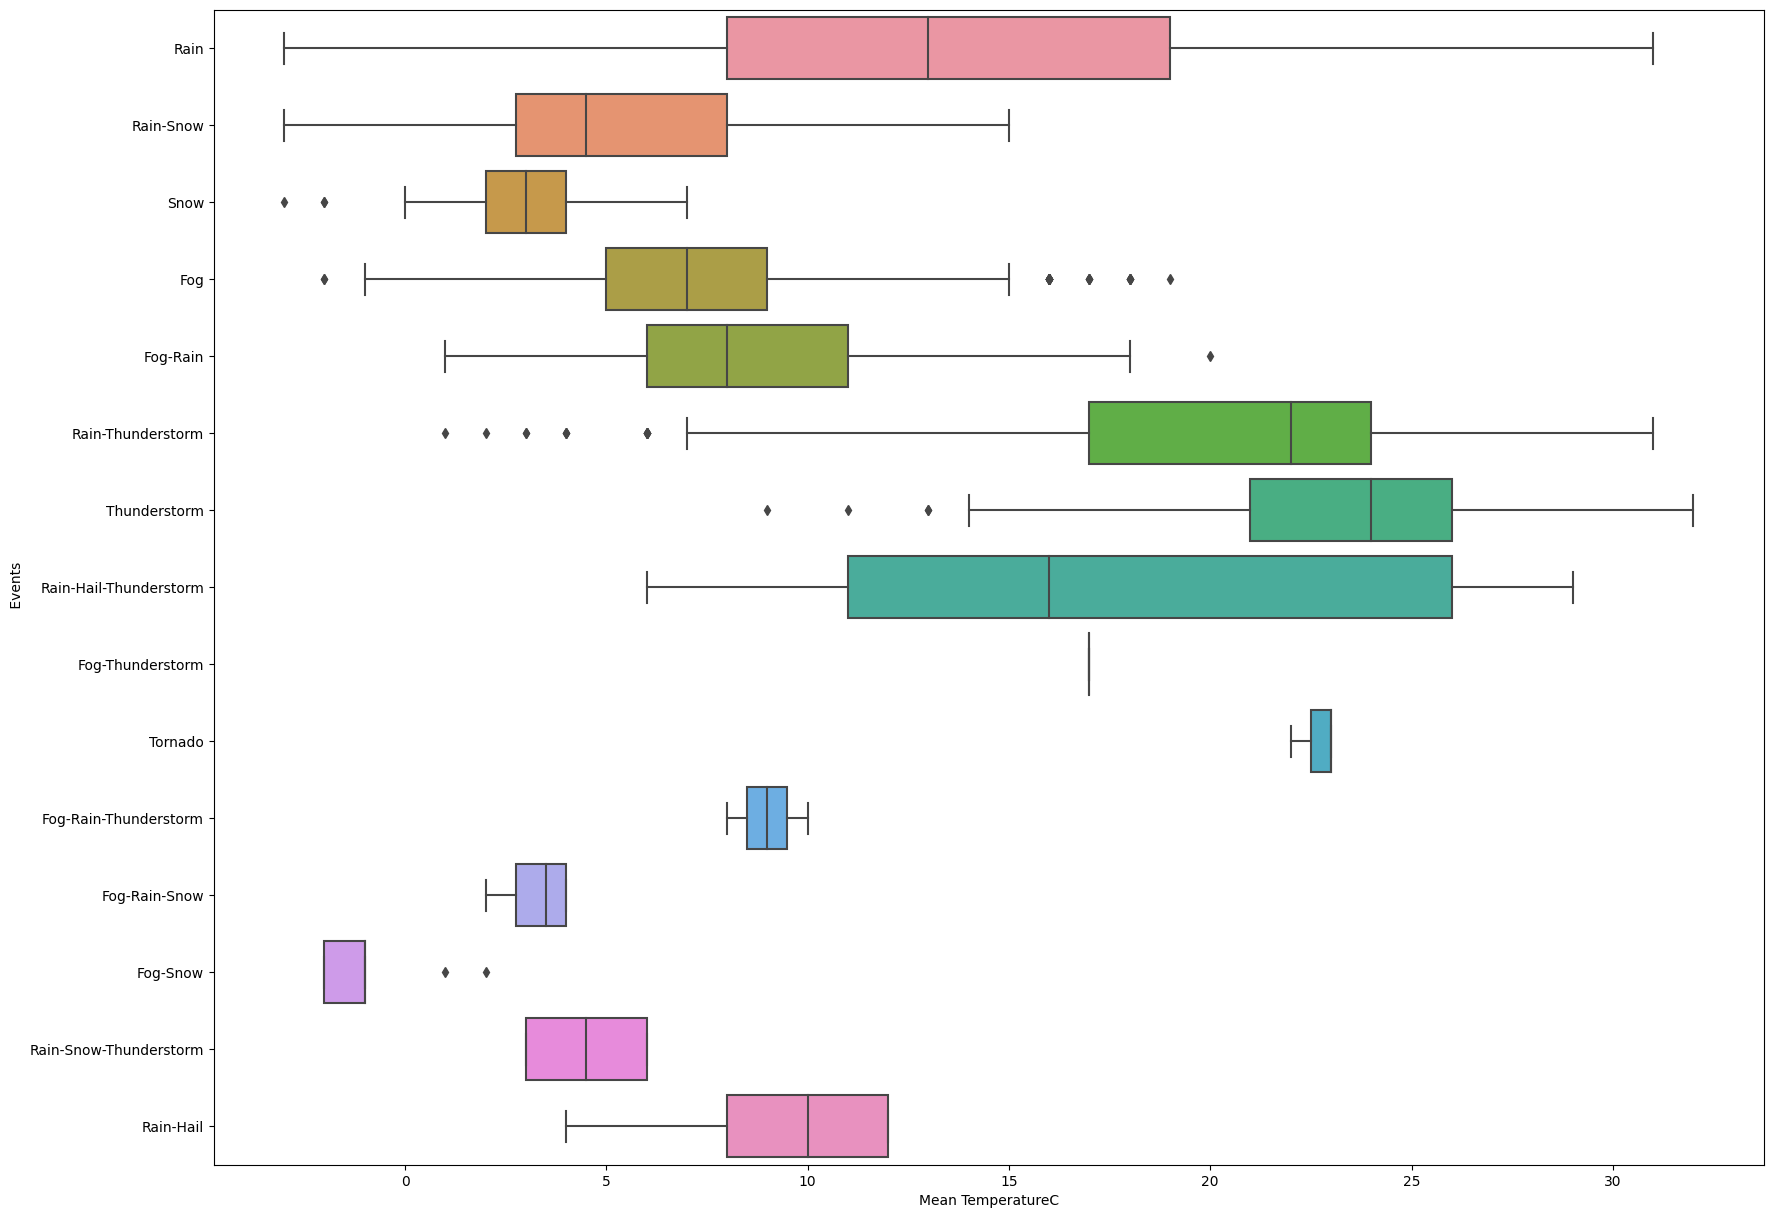

In [26]:
plt.figure(figsize=(20,15))
sns.boxplot(x=metro['Mean TemperatureC'],y=metro[' Events'],data=metro)
plt.show()

In [27]:
metro[' Mean Sea Level PressurehPa'].nunique()

54

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 13.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 21.7% of the points cannot be plac

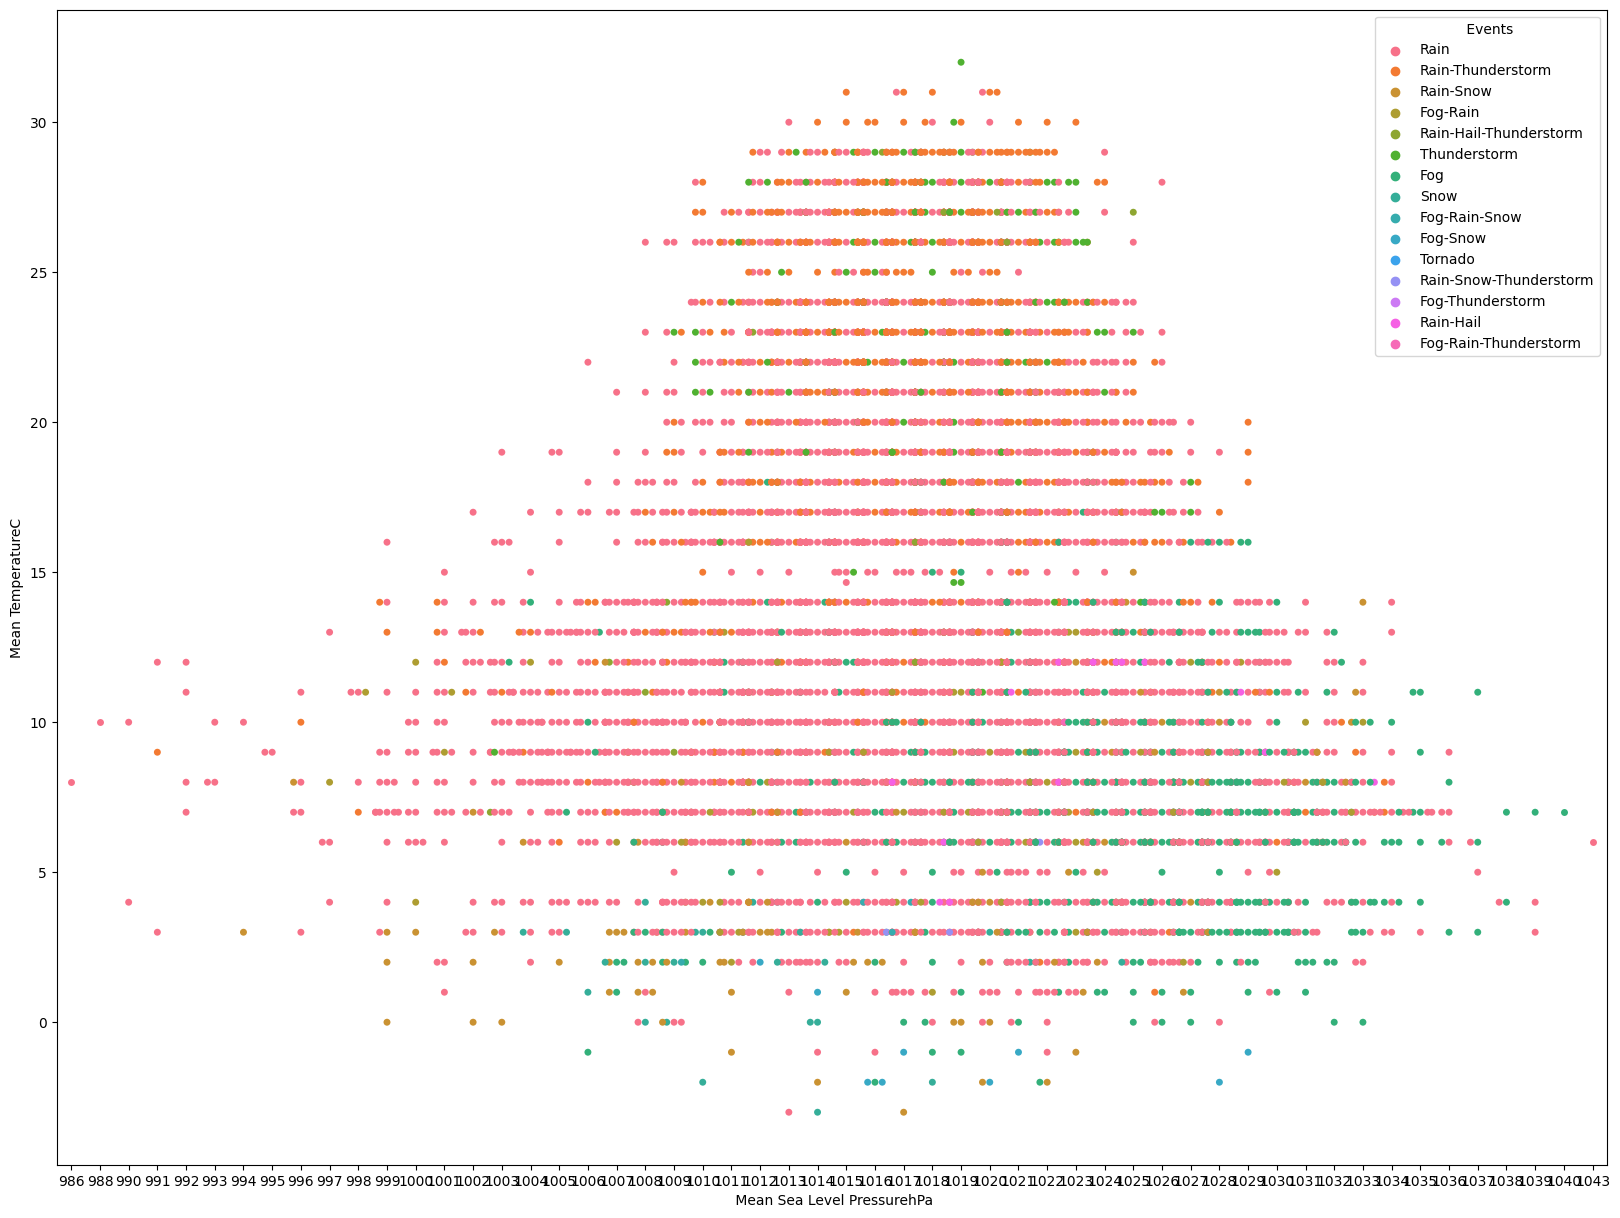

In [28]:
plt.figure(figsize=(20,15))
sns.swarmplot(x=metro[' Mean Sea Level PressurehPa'],y=metro['Mean TemperatureC'],hue=metro[' Events'])
plt.show()

In [29]:
metro[' Mean VisibilityKm'].nunique()

33

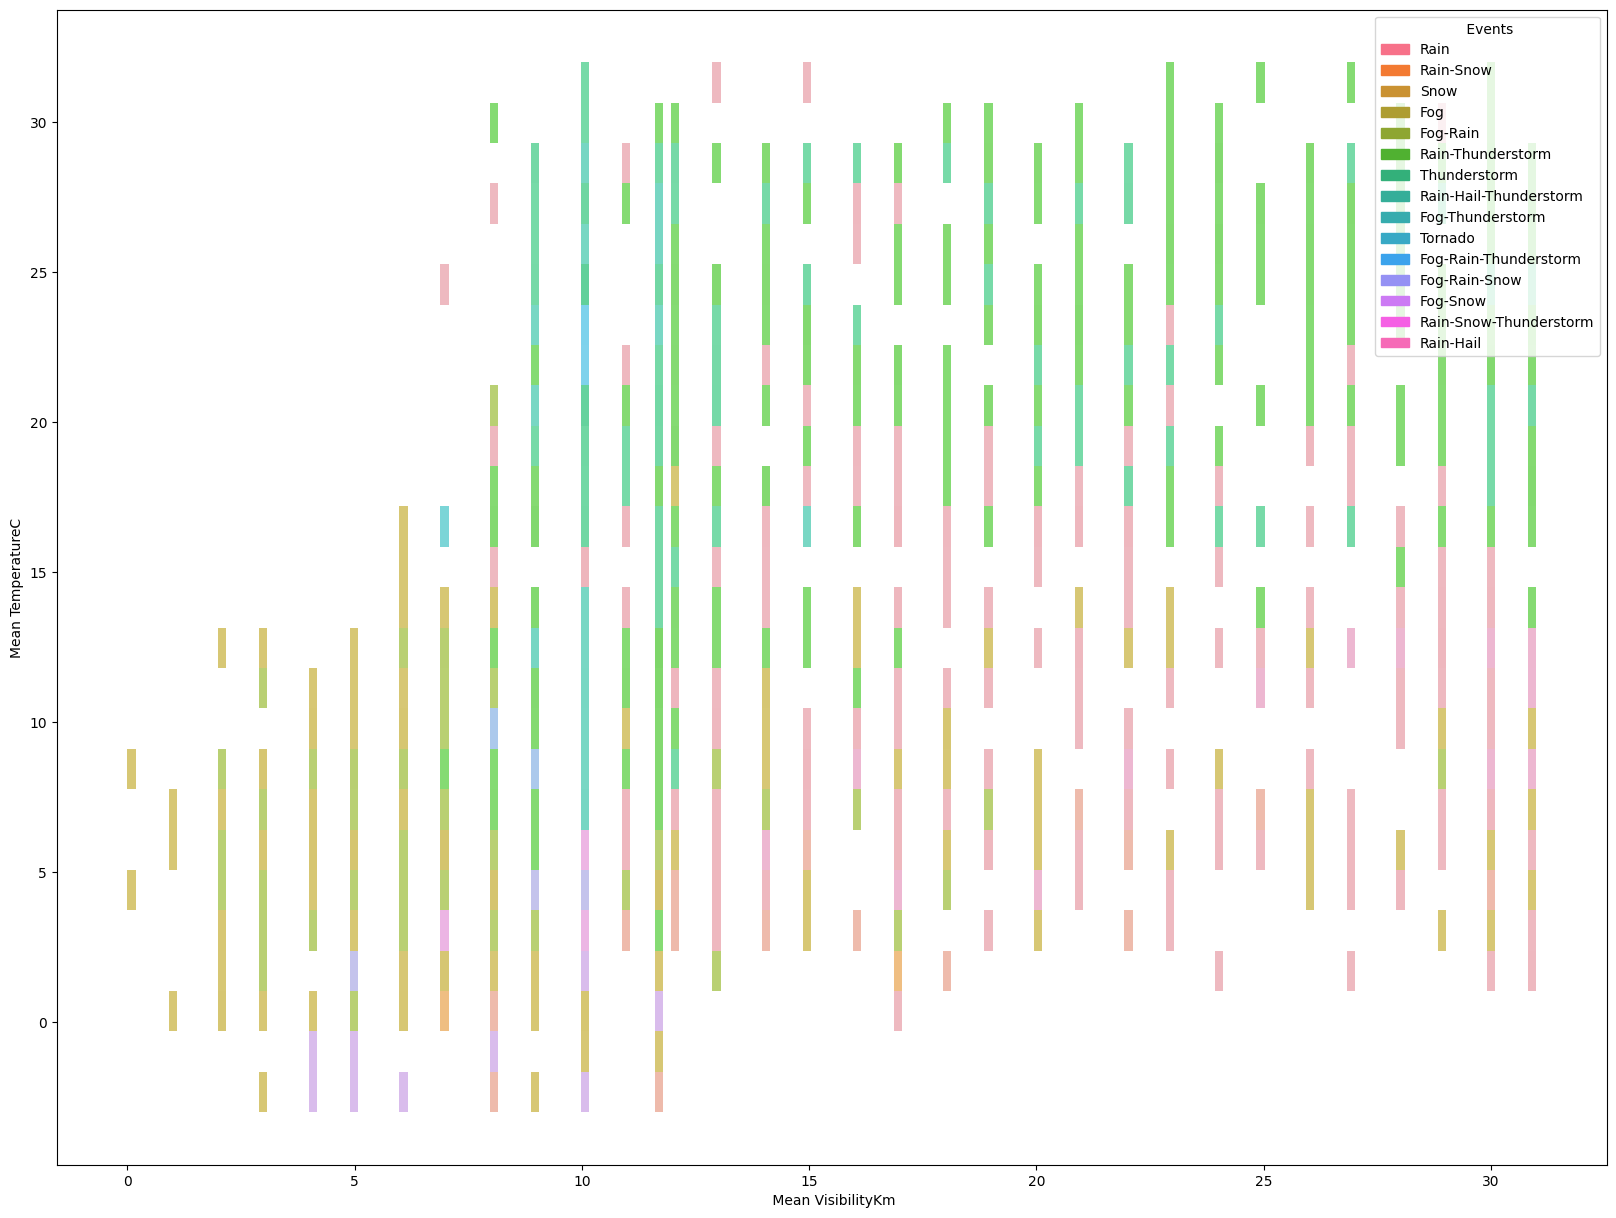

In [30]:
plt.figure(figsize=(20,15))
sns.histplot(x=metro[' Mean VisibilityKm'],y=metro['Mean TemperatureC'],hue=metro[' Events'],data=metro)
plt.show()

In [31]:
metro[' Mean Wind SpeedKm/h'].nunique()

24

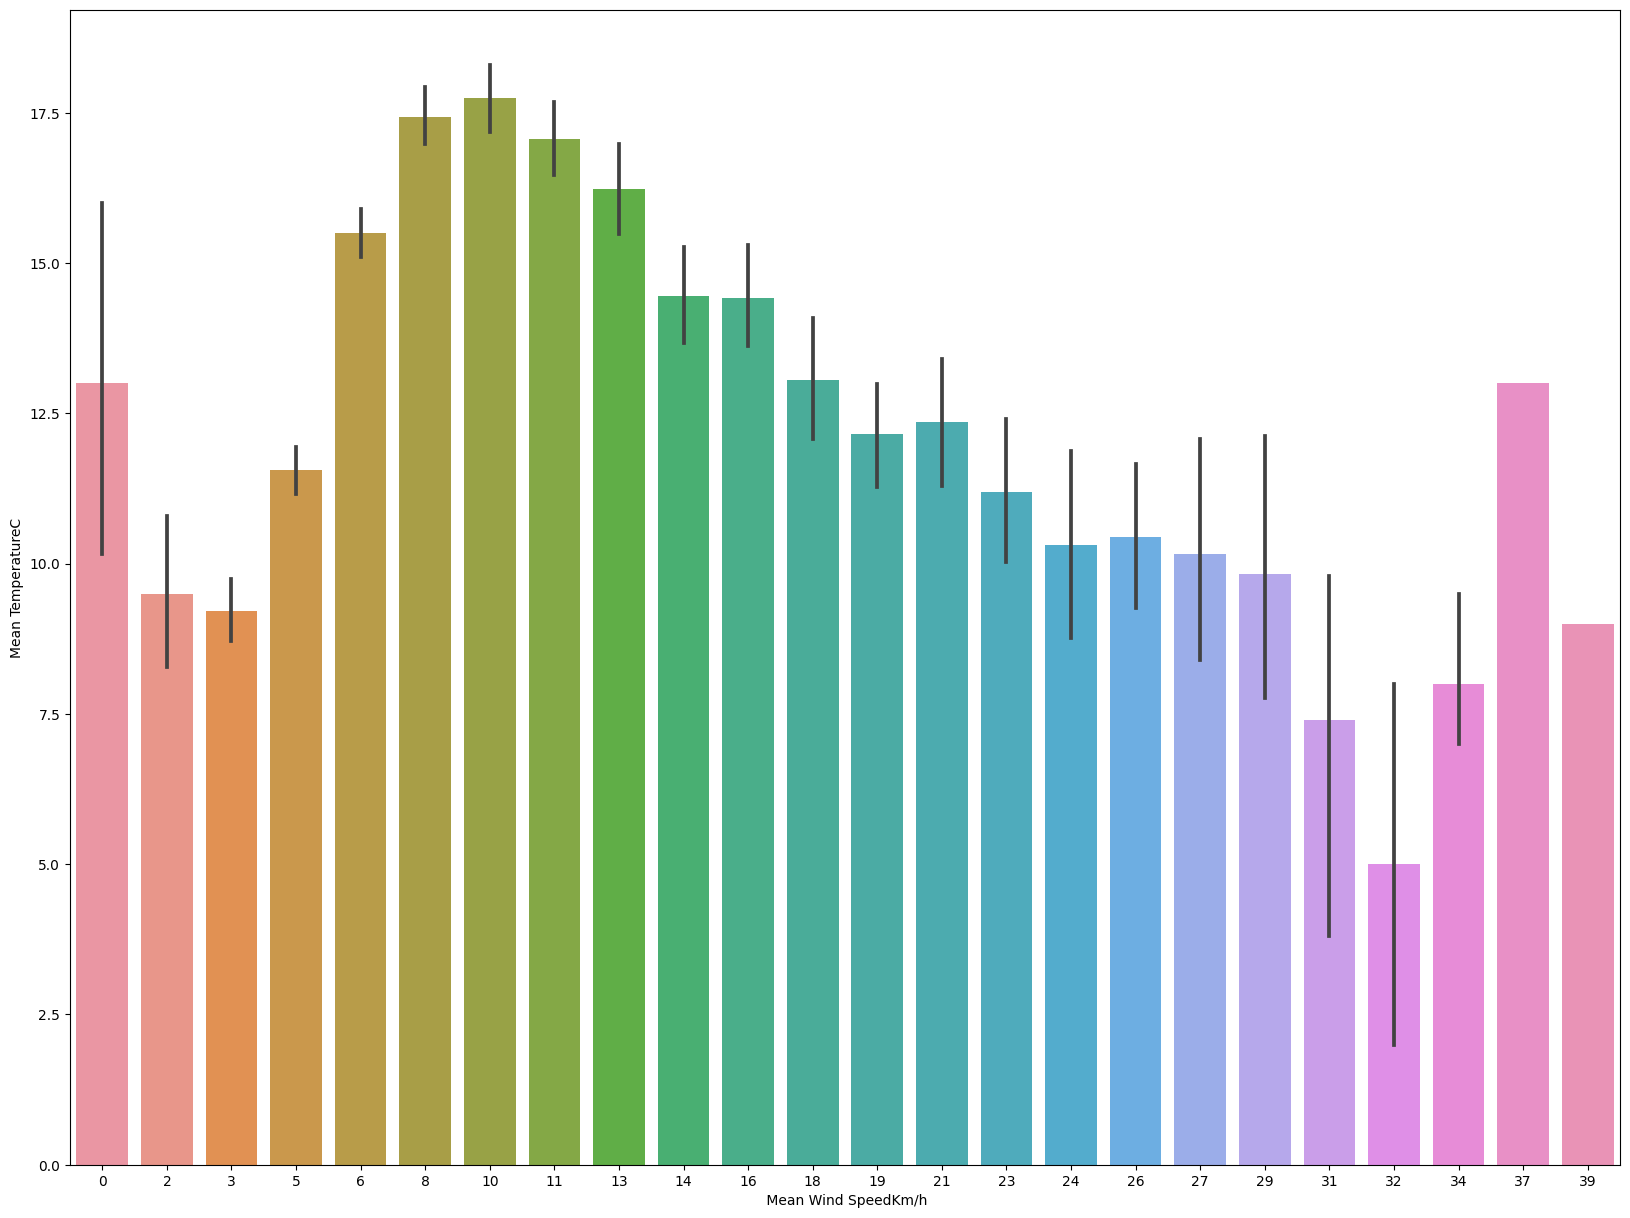

In [32]:
plt.figure(figsize=(20,15))
sns.barplot(x=metro[' Mean Wind SpeedKm/h'],y=metro['Mean TemperatureC'],data=metro)
plt.show()

In [33]:
metro['Precipitationmm'].nunique()

21

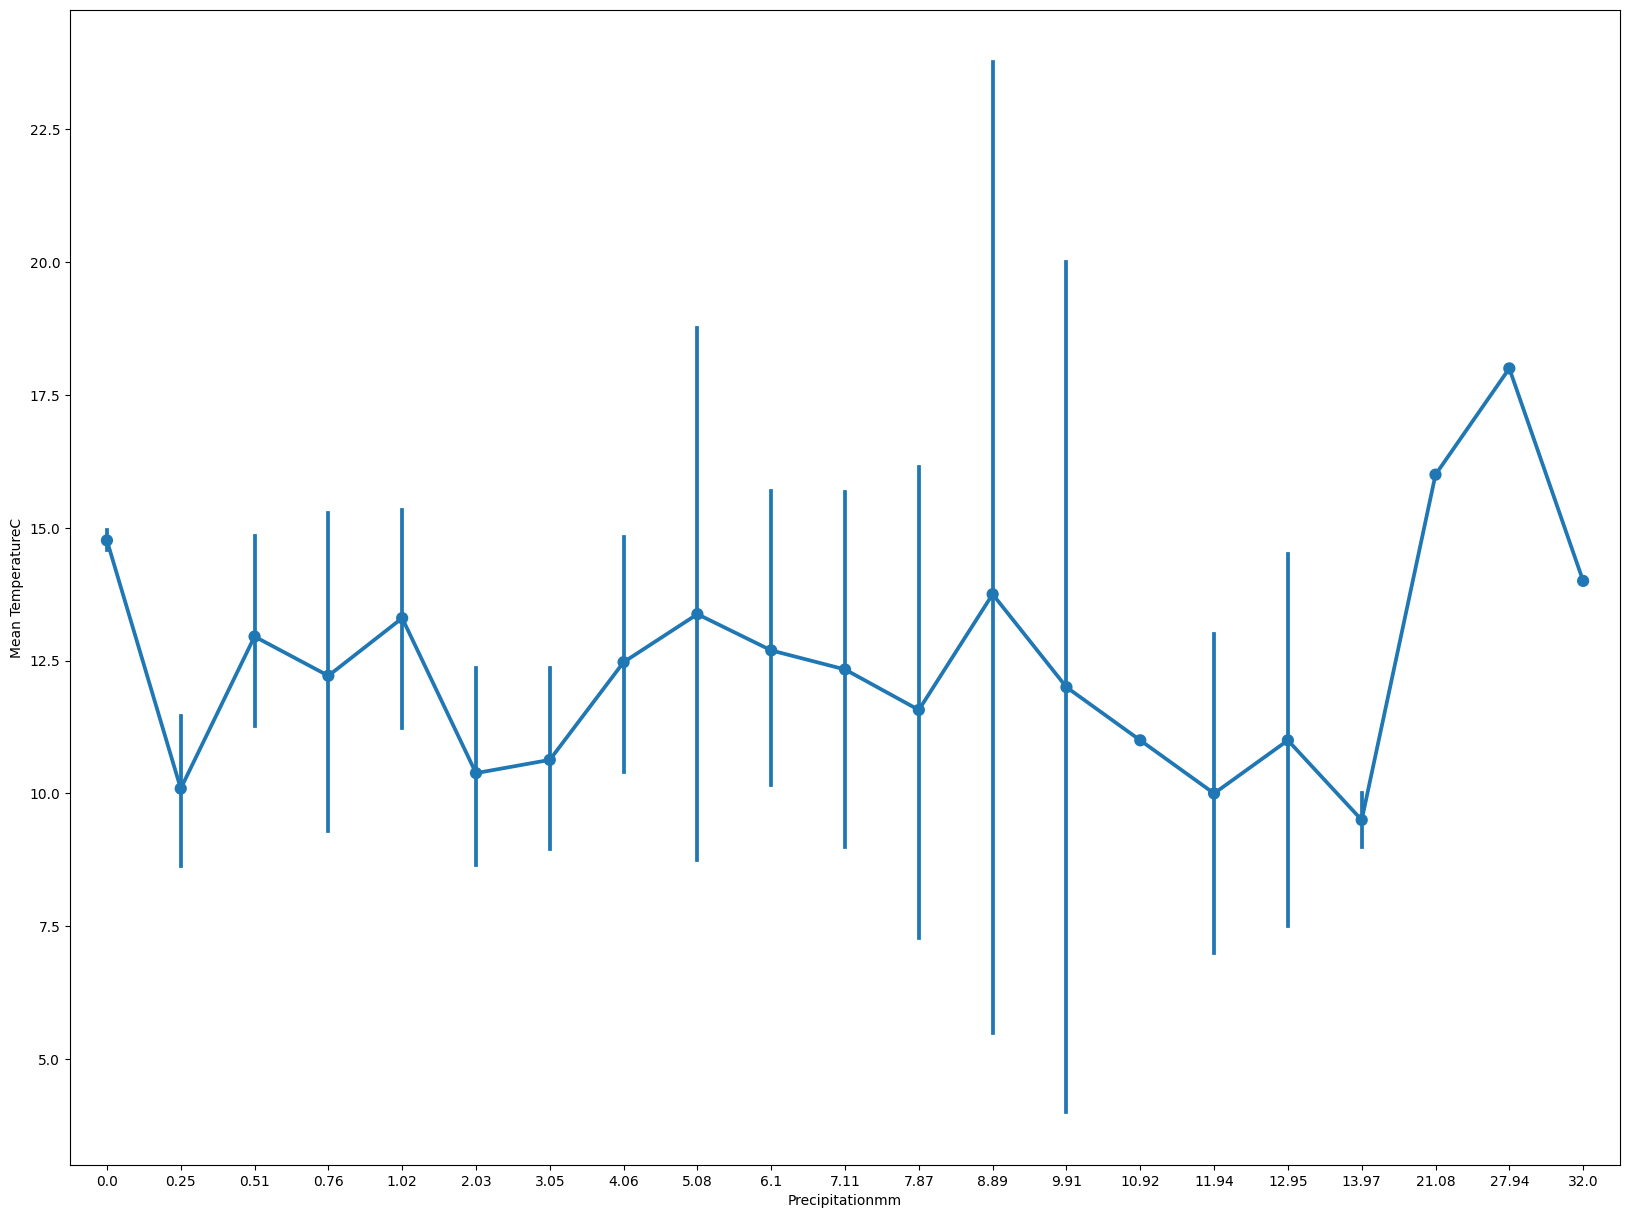

In [34]:
plt.figure(figsize=(20,15))
sns.pointplot(x=metro['Precipitationmm'],y=metro['Mean TemperatureC'],data=metro)
plt.show()

In [35]:
metro[' CloudCover'].nunique()

10

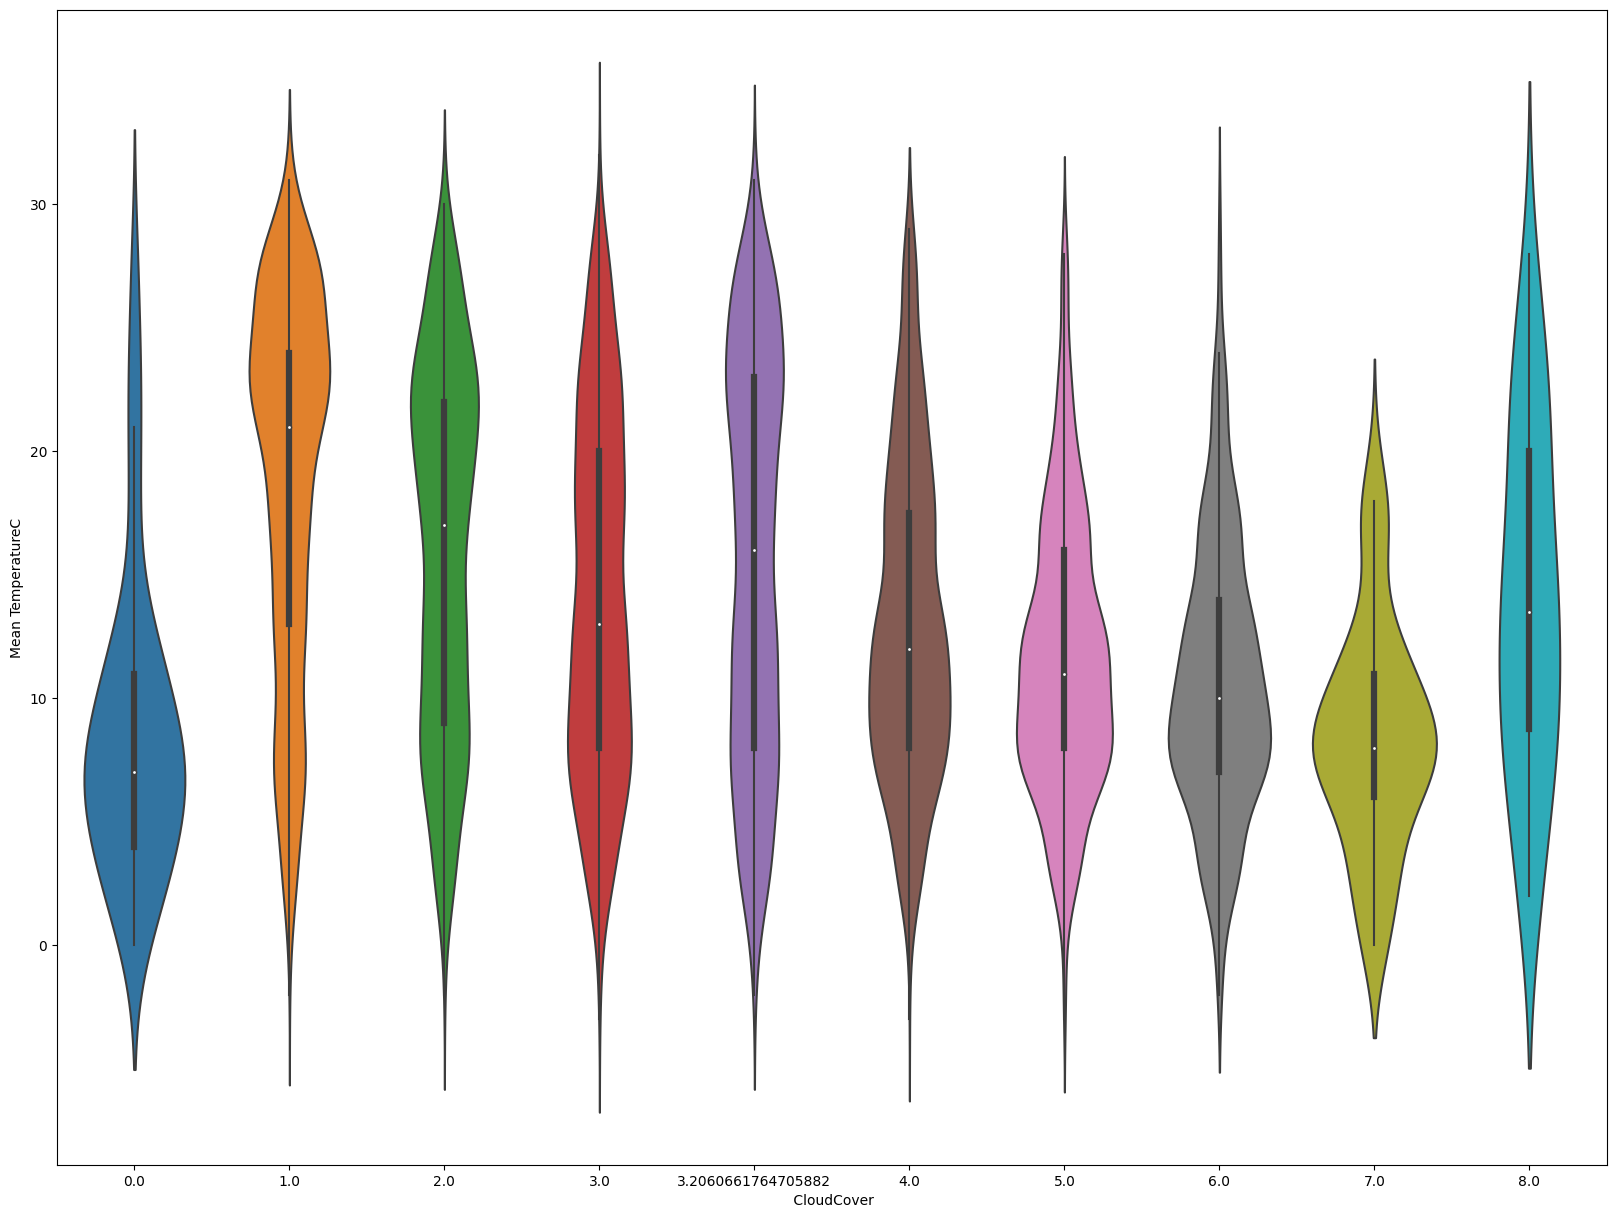

In [36]:
plt.figure(figsize=(20,15))
sns.violinplot(x=metro[' CloudCover'],y=metro['Mean TemperatureC'],data=metro)
plt.show()

In [37]:
metro['WindDirDegrees'].nunique()

361

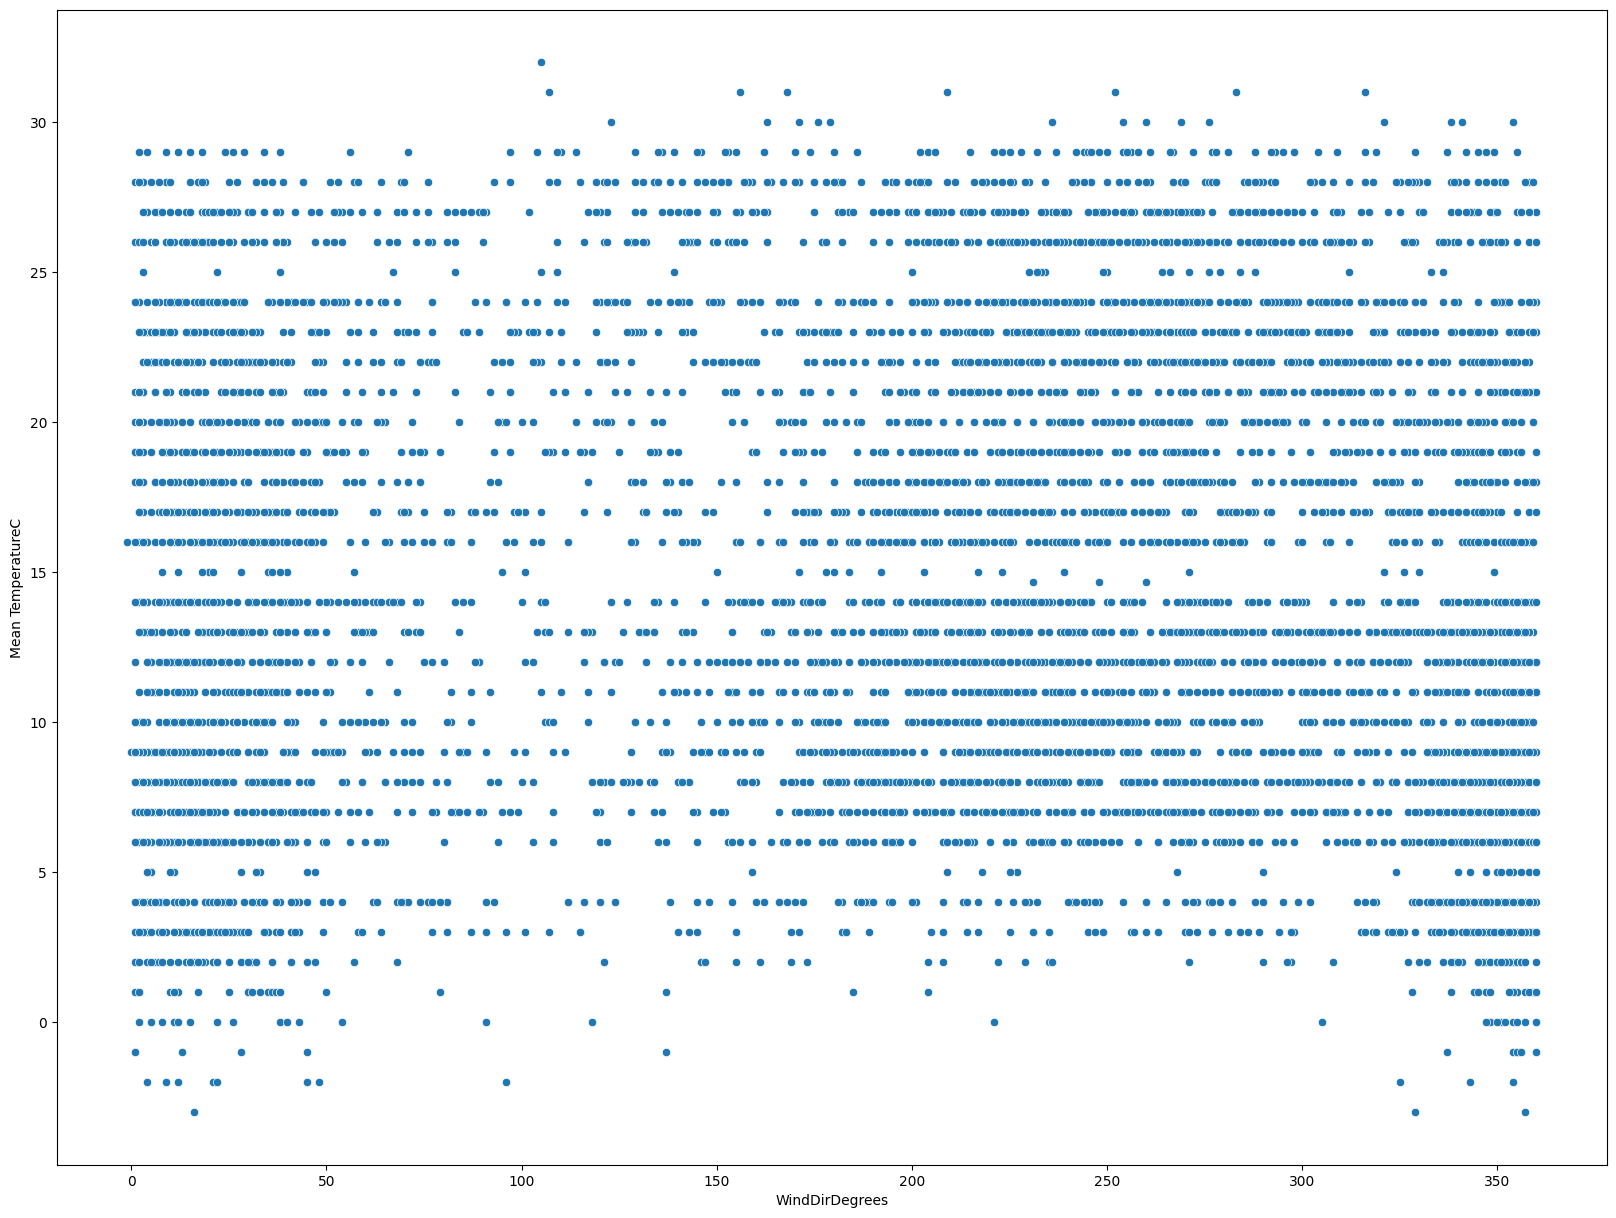

In [38]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=metro['WindDirDegrees'],y=metro['Mean TemperatureC'])
plt.show()

# ARIMA Model

### Check for Stationarity

In [39]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print('1. ADF:',dftest[0])
    print('2. P-value:',dftest[1])
    print('3. Num of lags:',dftest[2])
    print('4. Num of observations used for ADF regression and Critical Value calculations:',dftest[3])
    print('5. Critical Values:')
    for key,val in dftest[4].items():
        print('\t',key,':',val)

In [40]:
ad_test(metro['Mean TemperatureC'])

1. ADF: -5.643068689623002
2. P-value: 1.0259520990434663e-06
3. Num of lags: 34
4. Num of observations used for ADF regression and Critical Value calculations: 6777
5. Critical Values:
	 1% : -3.43131529122572
	 5% : -2.8619665789629667
	 10% : -2.5669970642600246


### Figure out order for ARIMA Model

In [41]:
pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ec/2b/e7d18360d56396b62781ba4616527af49244d4bed51f0780646fa3953cc8/pmdarima-2.0.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
from pmdarima import auto_arima
#ignore harmless warnings

import warnings
warnings.filterwarnings('ignore')

In [43]:
stepwise_fit = auto_arima(metro['Mean TemperatureC'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=28582.736, Time=6.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=46928.038, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=28971.492, Time=0.67 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=39997.906, Time=1.01 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=57528.020, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=28798.301, Time=3.17 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.56 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=28605.022, Time=3.92 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=28570.901, Time=12.46 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=28640.790, Time=4.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=28586.187, Time=8.75 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=28572.060, Time=13.09 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=28584.337, Time=5.31 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=28573.694, Time=10.45 sec
 ARIMA(2,0,3)(0,0,0)[0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 6812
Model:               SARIMAX(2, 0, 3)   Log Likelihood              -14278.450
Date:                Fri, 01 Dec 2023   AIC                          28570.901
Time:                        23:52:53   BIC                          28618.686
Sample:                             0   HQIC                         28587.389
                               - 6812                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0440      0.013      3.416      0.001       0.019       0.069
ar.L1          1.4885      0.049     30.223      0.000       1.392       1.585
ar.L2         -0.4916      0.049    -10.078      0.000      -0.587      -0.396
ma.L1         -0.6542      0.050    -13.122      0.000      -0.752      -0.556
ma.L2         -0.0716      0.016     -4.394      0.000      -0.103      -0.040
ma.L3         -0.0683      0.019     -3.641      0.000      -0.105      -0.032
sigma2         3.8722      0.062     62.238      0.000       3.750       3.994
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                61.57
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.10
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Model calling

In [44]:
import statsmodels.api as sm

### Splitting data into training and testing

In [45]:
print(metro.shape)
train=metro.iloc[:-150]
test=metro.iloc[-150:]
print(train.shape,test.shape)

(6812, 10)
(6662, 10) (150, 10)


### Training the model

In [46]:
model1 = sm.tsa.arima.ARIMA(train['Mean TemperatureC'],order=(0,0,0))
model1 = model1.fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Mean TemperatureC   No. Observations:                 6662
Model:                          ARIMA   Log Likelihood              -22965.669
Date:                Fri, 01 Dec 2023   AIC                          45935.337
Time:                        23:52:55   BIC                          45948.945
Sample:                             0   HQIC                         45940.038
                               - 6662                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.6295      0.094    155.629      0.000      14.445      14.814
sigma2        57.7806      1.482     38.983      0.000      54.876      60.686
===================================================================================
Ljung-Box (L1) (Q):                6183.21   Jarque-Bera (JB):               337.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         1.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
model2 = sm.tsa.arima.ARIMA(train['Mean TemperatureC'],order=(2,0,3))
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Mean TemperatureC   No. Observations:                 6662
Model:                 ARIMA(2, 0, 3)   Log Likelihood              -13982.838
Date:                Fri, 01 Dec 2023   AIC                          27979.677
Time:                        23:53:02   BIC                          28027.306
Sample:                             0   HQIC                         27996.130
                               - 6662                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8138      1.653      8.961      0.000      11.574      18.054
ar.L1          1.4983      0.050     30.257      0.000       1.401       1.595
ar.L2         -0.5012      0.049    -10.219      0.000      -0.597      -0.405
ma.L1         -0.6638      0.050    -13.236      0.000      -0.762      -0.566
ma.L2         -0.0689      0.016     -4.182      0.000      -0.101      -0.037
ma.L3         -0.0655      0.019     -3.459      0.001      -0.103      -0.028
sigma2         3.8941      0.063     61.460      0.000       3.770       4.018
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                58.19
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.10
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Make predictions on testing set

In [48]:
st = len(train)
ed = len(train)+len(test)-1
pred1 = model1.predict(start=st,end=ed,type='levels')
print(pred1)
pred1.index=metro.index[st:ed+1]
print(pred1)

6662    14.629532
6663    14.629532
6664    14.629532
6665    14.629532
6666    14.629532
          ...    
6807    14.629532
6808    14.629532
6809    14.629532
6810    14.629532
6811    14.629532
Name: predicted_mean, Length: 150, dtype: float64
CET
2015-08-04    14.629532
2015-08-05    14.629532
2015-08-06    14.629532
2015-08-07    14.629532
2015-08-08    14.629532
                ...    
2015-12-27    14.629532
2015-12-28    14.629532
2015-12-29    14.629532
2015-12-30    14.629532
2015-12-31    14.629532
Name: predicted_mean, Length: 150, dtype: float64


### Predicted Line Vs Actual Line

<Axes: xlabel='CET'>

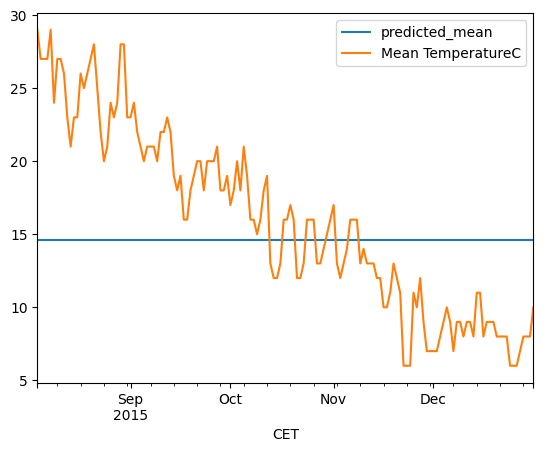

In [49]:
pred1.plot(legend=True)
test['Mean TemperatureC'].plot(legend=True)

In [50]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(pred1,test['Mean TemperatureC'])
print(rmse)

41.8902710754295


In [51]:
test['Mean TemperatureC'].mean()

15.953333333333333

In [52]:
st = len(train)
ed = len(train)+len(test)-1
pred2 = model2.predict(start=st,end=ed,type='levels')
print(pred1)
pred2.index=metro.index[st:ed+1]
print(pred1)

CET
2015-08-04    14.629532
2015-08-05    14.629532
2015-08-06    14.629532
2015-08-07    14.629532
2015-08-08    14.629532
                ...    
2015-12-27    14.629532
2015-12-28    14.629532
2015-12-29    14.629532
2015-12-30    14.629532
2015-12-31    14.629532
Name: predicted_mean, Length: 150, dtype: float64
CET
2015-08-04    14.629532
2015-08-05    14.629532
2015-08-06    14.629532
2015-08-07    14.629532
2015-08-08    14.629532
                ...    
2015-12-27    14.629532
2015-12-28    14.629532
2015-12-29    14.629532
2015-12-30    14.629532
2015-12-31    14.629532
Name: predicted_mean, Length: 150, dtype: float64


### Predicted Line Vs Actual Line

<Axes: xlabel='CET'>

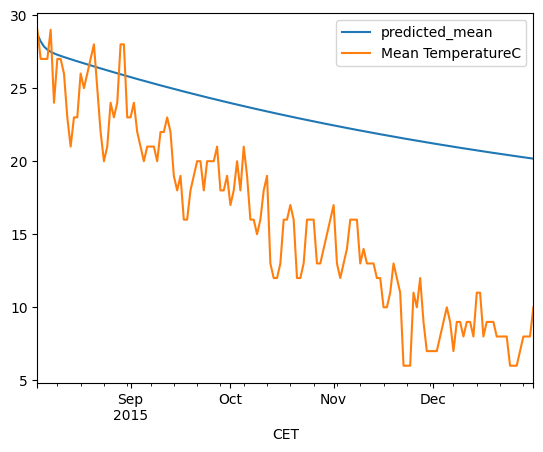

In [53]:
pred2.plot(legend=True)
test['Mean TemperatureC'].plot(legend=True)

In [54]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(pred2,test['Mean TemperatureC'])
print(rmse)

74.17817257893988


##### The ARIMA model is a time series analysis of only the 'Mean TemperatureC' parameter, and thus fails to yeild proper results. We can clearly see that the model is an under-fitting one.

# Linear Regression

### Label Encoding

In [55]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()           #label encoder variable for ' Events'
metro[' Events'] = le1.fit_transform(metro[' Events'])

### IP/OP Creation

In [56]:
ip=metro.drop(['Mean TemperatureC',' Events'],axis=1)
op=metro['Mean TemperatureC']

In [57]:
ip.shape

(6812, 8)

In [58]:
op.shape

(6812,)

### Analysis of best model training parameters

In [59]:
minjr=0          #stores the test_size at which the root mean square error score is minimum
minir=0          #stores the random_state at which the root mean square error score is minimum

minrmse=100      #stores the value of minimum root mean square error score

for i in range(0,201):                               #checks random_state from 0 to 200
    for j in [0.15,0.2,0.25,0.3,0.35,0.4,0.45]:      #checks test_size from a range of values

        from sklearn.model_selection import train_test_split
        x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=j,random_state=i)

        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.fit_transform(x_test)

        from sklearn.linear_model import LinearRegression
        lr = LinearRegression()
        lr.fit(x_train,y_train)
        yp1 = lr.predict(x_test)

        from sklearn.metrics import mean_squared_error
        rmse =  mean_squared_error(y_test,yp1)
        if rmse<minrmse:
            minrmse=rmse
            minir=i
            minjr=j

print('\nMin Root mean square error score at',minir,'random state',minjr,'test size with root mean square error score=',minrmse)


Min Root mean square error score at 160 random state 0.2 test size with root mean square error score= 1.6891822615871013


### Final Model

In [60]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=160)
xts = y_train
#taking the best value for test_size and random_state

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

from sklearn.linear_model import LinearRegression
model3 = LinearRegression()
model3.fit(x_train,y_train)
yp1 = model3.predict(x_test)

In [61]:
xts

CET
2006-04-14    13.0
2013-11-27     6.0
2004-03-20    12.0
2012-09-29    16.0
2011-05-17    18.0
              ... 
2008-02-12     6.0
2000-07-14    24.0
2003-12-06     6.0
2002-08-20    26.0
2006-03-08    11.0
Name: Mean TemperatureC, Length: 5449, dtype: float64

In [62]:
yp1

array([25.1507709 ,  5.47106163,  8.45408227, ...,  3.99015886,
        7.54929017,  8.27152275])

### Predicted Line Vs Actual Line

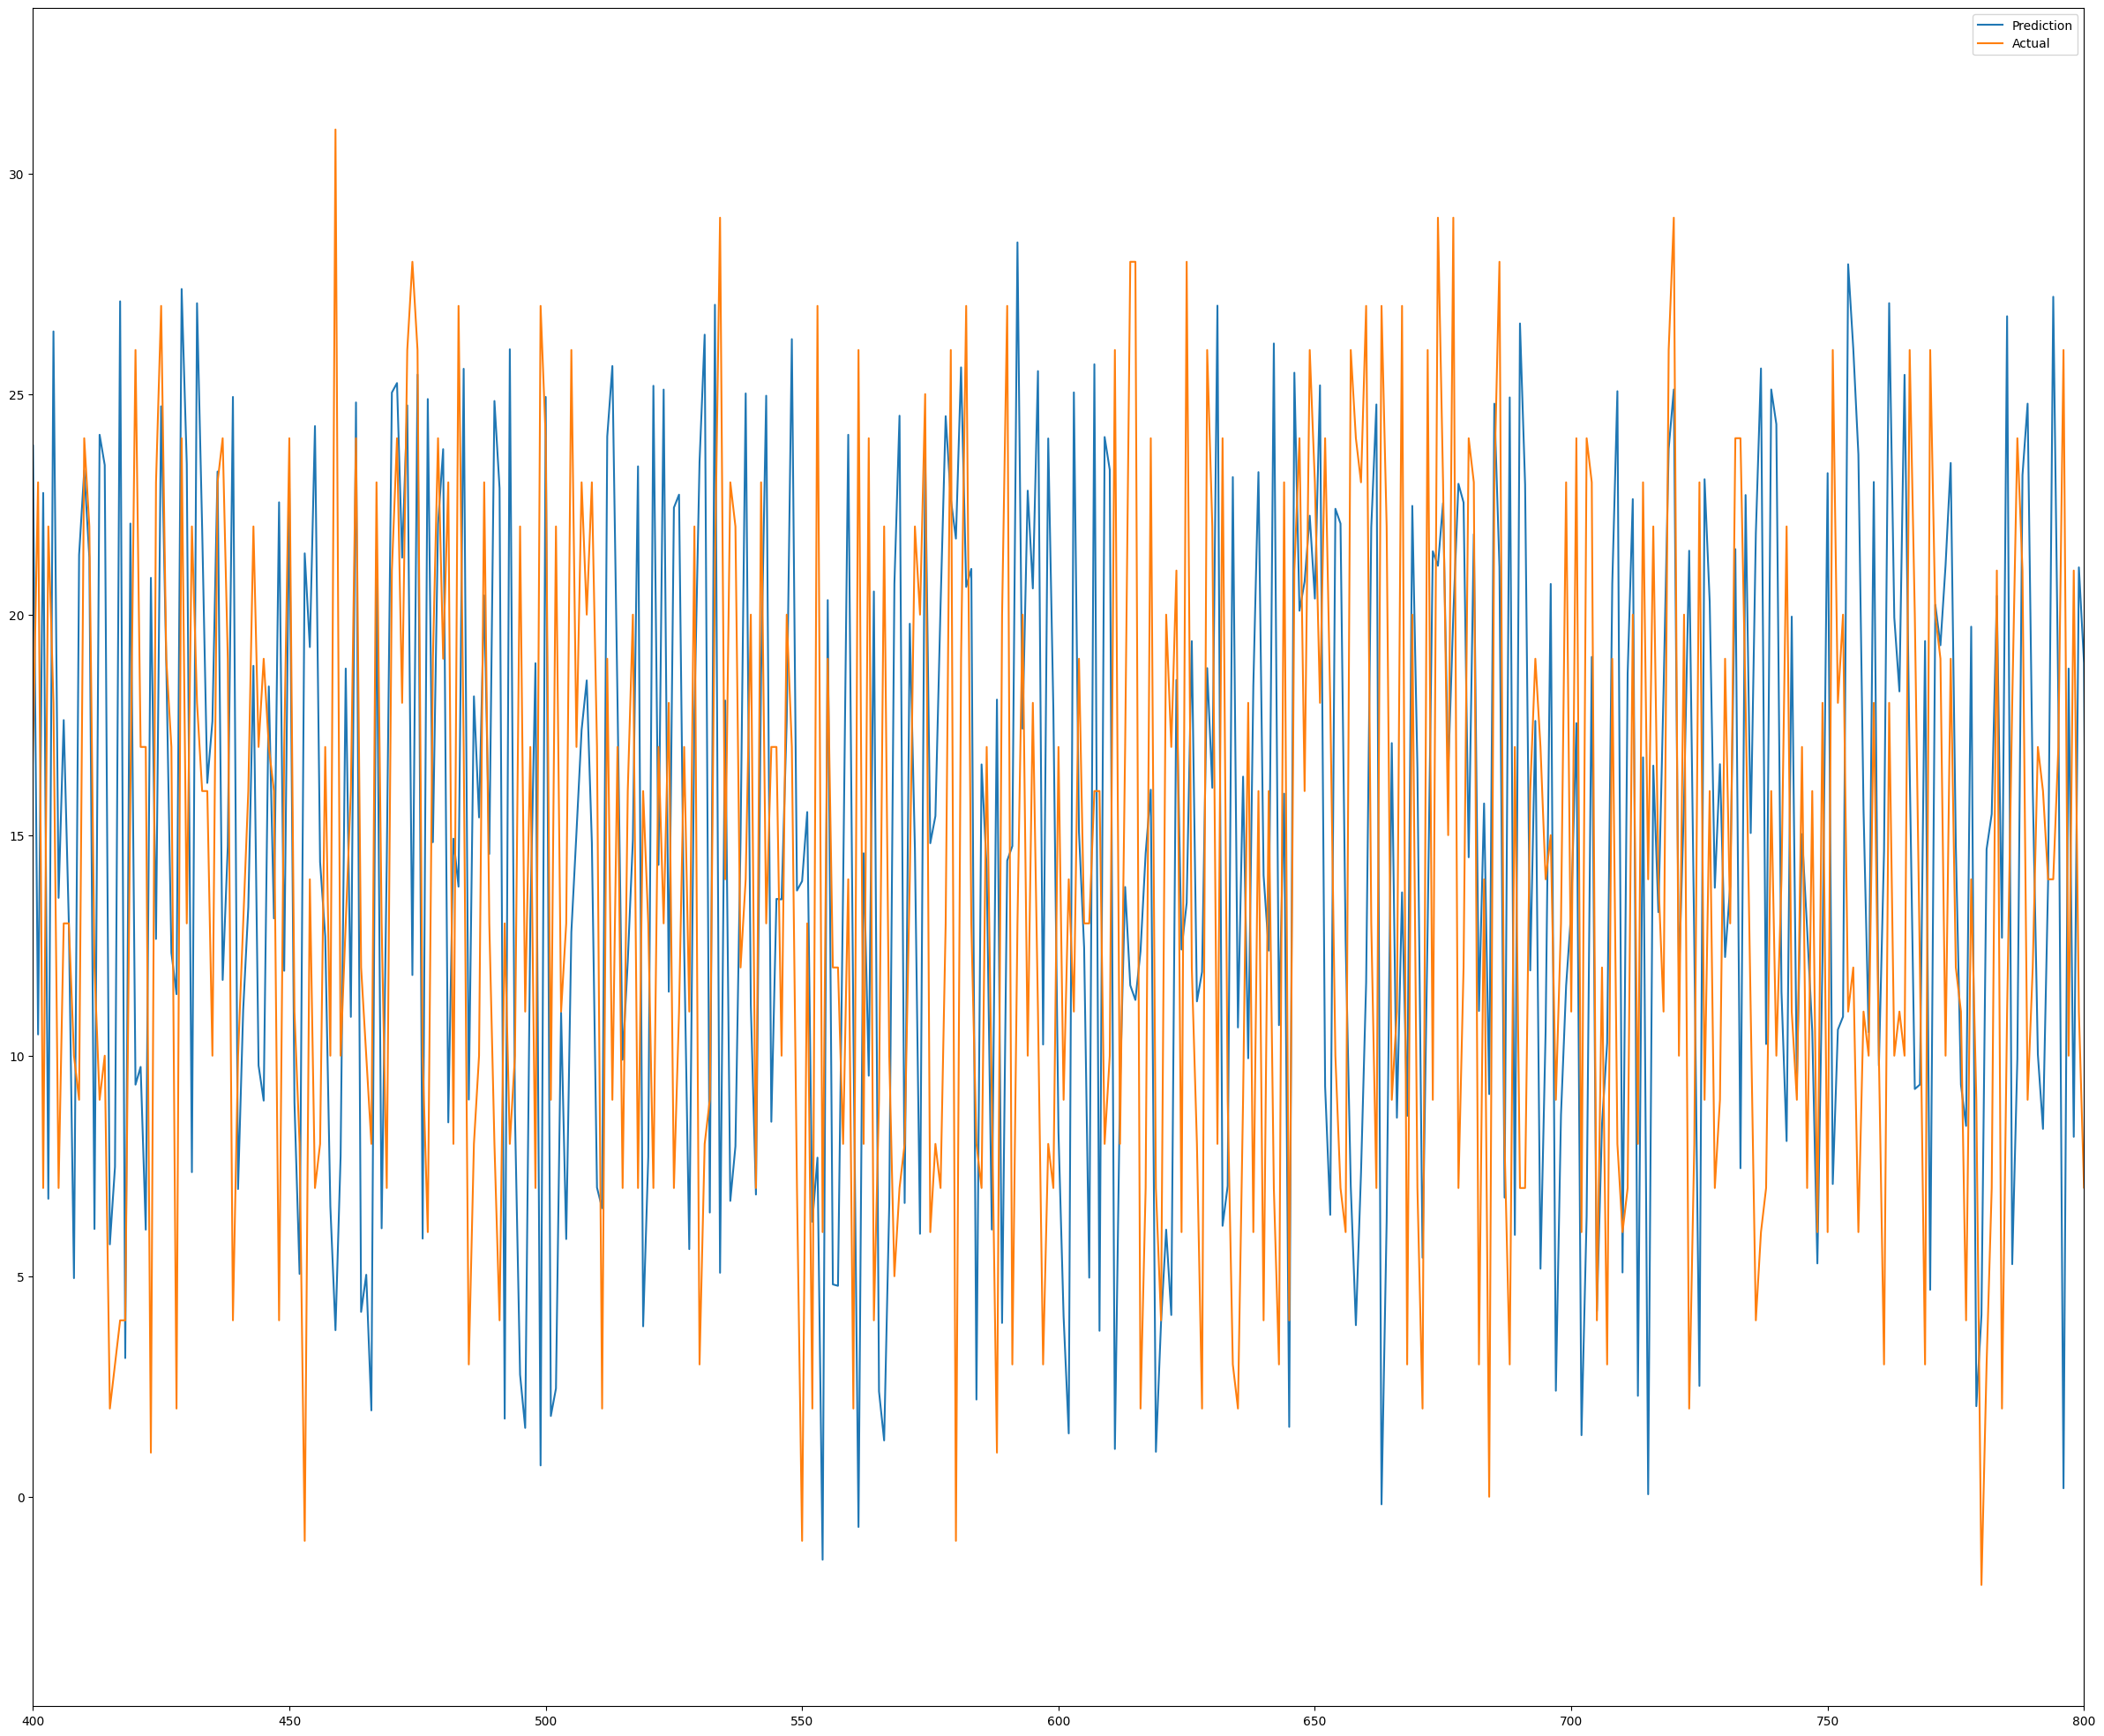

In [63]:
yp1_series = pd.Series(yp1)

# Reset indexes
yp1_series_reset = yp1_series.reset_index(drop=True)
xts_series_reset = xts.reset_index(drop=True)

plt.figure(figsize=(30,25))

# Plotting
plt.plot(yp1_series_reset, label='Prediction')
plt.plot(xts_series_reset, label='Actual')
plt.xlim(400, 800)  # Set x-axis limits

plt.legend()  # Show legend
plt.show()  # Show the plot

##### The Linear Regression model takes into account not only the 'Mean TemperatureC' parameter, but also the other affecting parameters. Thus the root mean squared error in this case decreases drastically, which is good. But due to the non-linearity of the data sample, other models are also taken into account.

**ANN**

In [64]:
from keras.models import Sequential

from keras.layers import Dense

from keras.optimizers import SGD

import random

np.random.seed(0)

In [65]:
metro['Mean TemperatureC'].nunique()

37

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.2,random_state=160)

In [67]:
def create_model():
    model = Sequential()
    model.add(Dense(1024,input_dim=8,activation='relu'))                 #for input layer-> 1024 nodes
    model.add(Dense(256,activation='tanh'))                             #1st hidden layer-> 256 nodes
    model.add(Dense(128,activation='relu'))                             #2nd hidden layer-> 128 nodes
    model.add(Dense(37,activation='softmax'))
    model.compile(optimizer=SGD(lr=0.01), loss='mean_absolute_error', metrics=['mae'])
    return model

In [68]:
model = create_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              9216      
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 37)                4773      
                                                                 
Total params: 309285 (1.18 MB)
Trainable params: 309285 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [69]:
h = model.fit(x_train,y_train,validation_split=0.1,epochs=30,batch_size=200,verbose=1)

Epoch 1/30
25/25 [==============================] - 1s 18ms/step - loss: 14.6873 - mae: 14.6873 - val_loss: 14.1844 - val_mae: 14.1844
Epoch 2/30
25/25 [==============================] - 0s 9ms/step - loss: 14.6873 - mae: 14.6873 - val_loss: 14.1844 - val_mae: 14.1844
Epoch 3/30
25/25 [==============================] - 0s 9ms/step - loss: 14.6873 - mae: 14.6873 - val_loss: 14.1844 - val_mae: 14.1844
Epoch 4/30
25/25 [==============================] - 0s 9ms/step - loss: 14.6873 - mae: 14.6873 - val_loss: 14.1844 - val_mae: 14.1844
Epoch 5/30
25/25 [==============================] - 0s 9ms/step - loss: 14.6873 - mae: 14.6873 - val_loss: 14.1844 - val_mae: 14.1844
Epoch 6/30
25/25 [==============================] - 0s 9ms/step - loss: 14.6873 - mae: 14.6873 - val_loss: 14.1844 - val_mae: 14.1844
Epoch 7/30
25/25 [==============================] - 0s 8ms/step - loss: 14.6873 - mae: 14.6873 - val_loss: 14.1844 - val_mae: 14.1844
Epoch 8/30
25/25 [==============================] - 0s 9ms/st

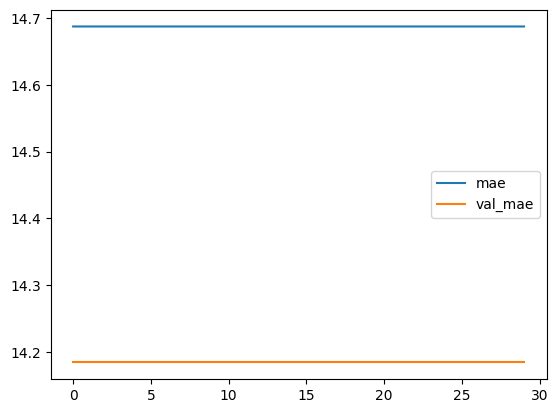

In [70]:
plt.plot(h.history['mae'])
plt.plot(h.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()